<h2><b style="color:teal"> Welcome to the FamInsureCo Python Case Study! </b></h2>

<img src = ./LL-INSURANCE-LOGO1.png>

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze FamInsureCo's Data

You might have realised that whilst Excel is powerful, it was a bit tricky creating Box Plots, multiple line plots and in general, doing quick analysis in Excel. You had to use a lot of filters to subset the data, which, then provided your charts were linked, created a number of issues with your other visuals.

In this Case Study, we're going to *revisit* the FamInsureCo Case Study, but with a few added questions that will really emphasise how Python can speed up our analysis and improve our data visualisation capabilities! 


**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor <u>before</u> moving on to part 2. 

Let's get started! 

<h2><b style="color:teal">Descriptive Statistics</b></h2>

### Step 1: <span style="color:teal">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

Please note we've included the `mpl.rcParams['figure'figsize']` code for you.

This code controls how big your charts will be with the syntax of (X,Y) where X represents the X Axis and Y, the Y Axis.

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [3]:
# Import libraries
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


### Step 2: <span style="color:teal">Descriptive Statistics</span> 
The data you'll need to complete the FamInsureCo Case Study is stored in the `.csv` file titled; `FamInsureCo.csv`.

<b> Please complete the following below: </b>

i. Import the `FamInsureCo.csv` dataset and store this in a dataframe titled, `FamInsureCo_Data`. 

ii. Referencing the `FamInsureCo_Data dataframe` you created, use the `.describe()` method to print out the Summary Statistics for the dataframe.

What do you observe? 

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [4]:
# Import data
FamInsureCo_Data = pd.read_csv('FamInsureCo_OLS_Case_Study.csv')

# View summary stats
FamInsureCo_Data.describe()

,age,bmi,medical_insurance_charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422414
std,14.049960,6.098187,12110.011240
min,18.000000,15.960000,1121.870000
25%,27.000000,26.296250,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.693750,16639.915000
max,64.000000,53.130000,63770.430000


### Observations:

#### 1. **Age**: 
   - **Dataset Size**: The dataset has 1,338 records.
   - **Average**: The average age is approximately 39.2 years.
   - **Range**: The age range is from 18 to 64, indicating a fairly wide range of age groups.
   - **Standard Deviation**: The standard deviation is around 14, suggesting moderate variability in age among the sample.
   - **Median**: The median (50th percentile) is 39, closely matching the mean, suggesting a somewhat symmetrical distribution.

#### 2. **BMI**:
   - **Average**: The average BMI is around 30.7, which is generally considered to be in the "overweight" category.
   - **Range**: The BMI ranges from a minimum of 15.96 to a maximum of 53.13, indicating a wide range of body weights and sizes.
   - **Standard Deviation**: The standard deviation of about 6.1 shows moderate variability in BMI among the sample.
   - **Median**: The median is 30.4, closely aligned with the mean, suggesting that the data may be approximately symmetric.

#### 3. **Medical Insurance Charges**:
   - **Average**: The average medical insurance charge is approximately $13,270.42.
   - **Range**: The charges vary widely, ranging from $1,121.87 to $63,770.43.
   - **Standard Deviation**: The standard deviation is high (~$12,110), indicating a substantial degree of variability in charges.
   - **Median**: The median is $9,382.03, which is significantly lower than the mean. This could suggest that the distribution is skewed to the right, with a few very high charges pulling the mean upwards.
   - **Skewness**: The 75th percentile is substantially higher than the median, further suggesting a right-skewed distribution.

---

### Summary:

- **Age**: The age distribution seems fairly balanced, with a moderate range and variability.
- **BMI**: The BMI data suggests that the sample population tends to be on the heavier side.
- **Medical Insurance Charges**: Medical insurance charges show a high degree of variability and are likely right-skewed, meaning there are some exceptionally high charges.

---

### Step 3: <span style="color:teal">Create a Single Scatter Plot </span> 

Previously, when we kicked off our analysis in Excel, we started with some Scatter Plots.

As a quick refresher, scatter plots are a useful way to compare two variables and determining whether any relationship might exist between them. We've included an example below of what this looks like to jog your memory.

<img src = "https://seaborn.pydata.org/_images/scatterplot_3_0.png"> 

i) Create a Scatter Plot highlighting the Medical Insurance Costs (Y-Axis) against the Body mass Index (X-Axis) using the `FamInsureCo` dataframe you created earlier. 

<b> Hint: You might find <a href = "https://seaborn.pydata.org/generated/seaborn.scatterplot.html"> this</a> link helpful! </b>

<h2><b style="color:salmon"> Place your code here </b> </h2>


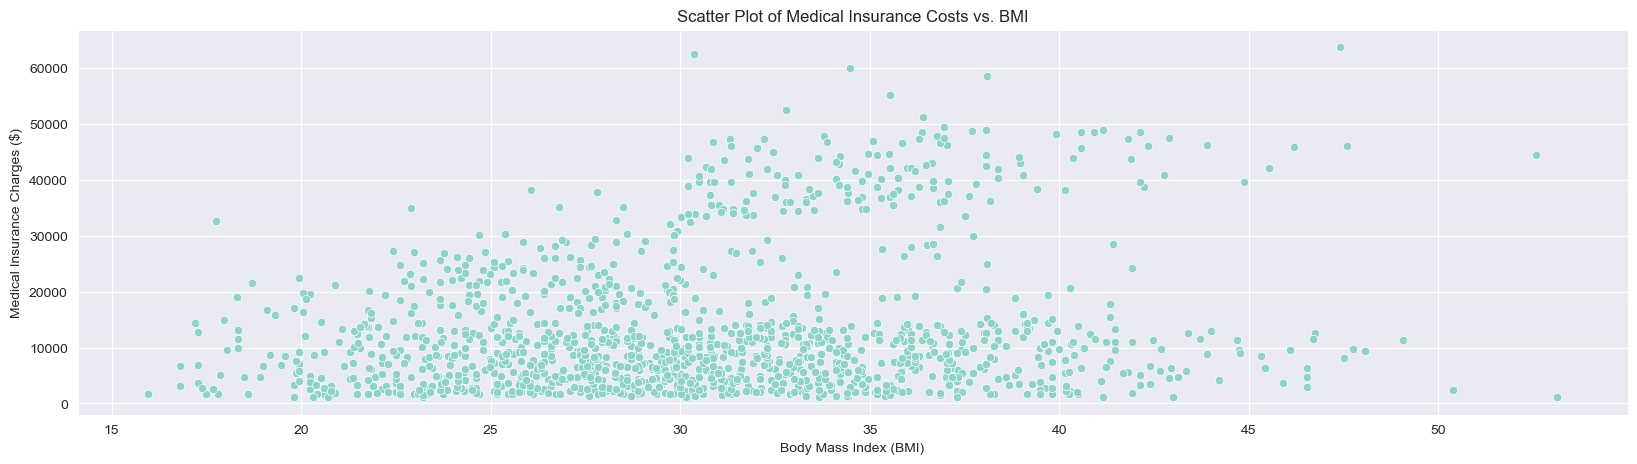

In [5]:
# Create Scatter Plot
sns.scatterplot(x='bmi', y='medical_insurance_charges', data=FamInsureCo_Data)
plt.title('Scatter Plot of Medical Insurance Costs vs. BMI')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Medical Insurance Charges ($)')
plt.show()

The scatter plot depicts the relationship between Body Mass Index (BMI) and Medical Insurance Charges. Here are a few observations:

1. **Positive Correlation**: Generally, there appears to be a positive correlation between BMI and medical insurance charges. As BMI increases, the medical insurance charges also seem to rise.
2. **Outliers**: There are a few points that stand out, particularly at higher charges. These could be cases with additional health complications that drive up insurance costs.
3. **Cluster Zones**: Two distinct clusters are visible in the plot — one around the lower medical charges and another at the higher end of medical charges. This could indicate that other factors, like smoking status, might be affecting the insurance charges as well.

### Step 4: <span style="color:teal"> Multiple Classifications in a Scatter Plot</span> 


Previously, you would have recalled how you had to create a 'hacky' workaround to get multiple colors displaying for the BMI vs Medical Charges vs. Weight Classification Scatter Plot.

Now this is one of the challenges with Excel; if you want to color code your chart based off textual information, you're going to have to <b> manually </b> identify each range that applies for said textual category, and then input this in your Excel Chart.

In the next question, we're going to simplify this process dramatically through the Power of Python.

You'll tackle this question over two small steps.

i) Create a new column titled `BMI_Classification` that makes use of `IF THEN Logic` to match the below criteria: 

    A) BMI < 18.5: Underweight
    B) BMI > 18.5 and <= 24.9: Healthy
    C) BMI > 24.9 and <= 29.9: Slightly Overweight
    D) BMI > 30: Overweight

<b> Hint: This <a href = "https://blog.hubspot.com/website/pandas-if-else"> resource </a> will be helpful! </b>

If you're still stuck, take a look at this SO link <a href = "https://stackoverflow.com/questions/49228596/pandas-case-when-default-in-pandas"> here</a>! 

2. Upon completion of this logic, create a Scatter Plot that uses the `BMI_Classification` Column as the `hue` for your Scatter Plot.

We've included an example below to show-case how this syntax works:

~~~
seaborn.scatterplot(data=dataframe, x=dataframe['ColA'], y=dataframe['ColB'], 
hue=Textual_Criteria) 
 
plt.show()
~~~ 


<h2><b style="color:salmon"> Place your code here </b> </h2>

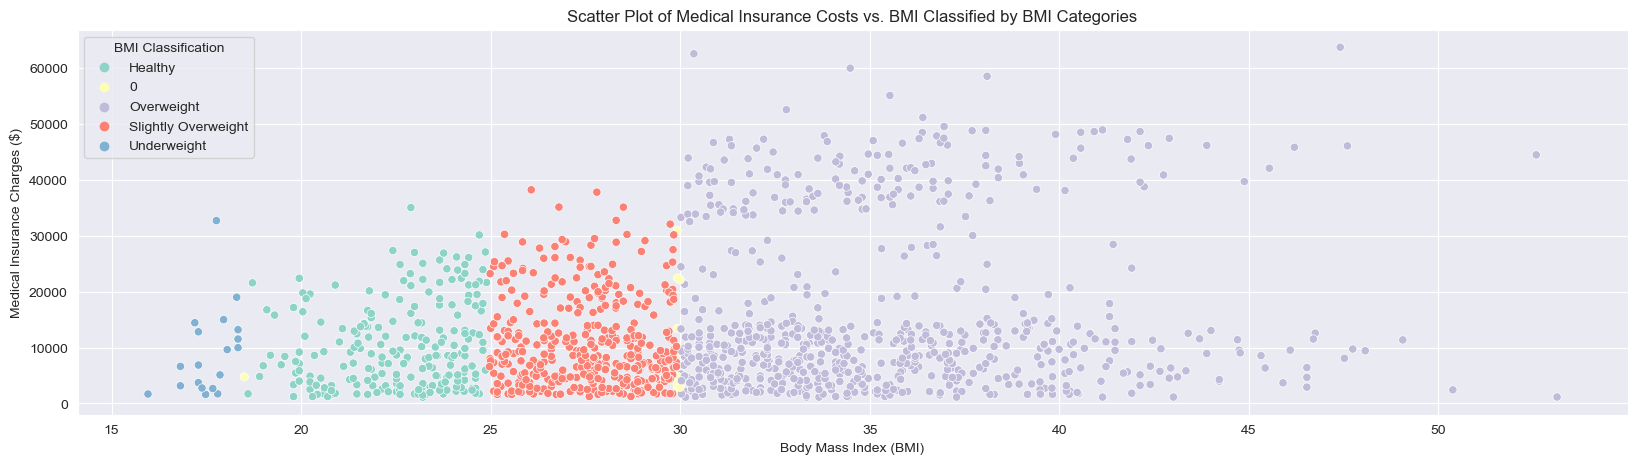

In [6]:
# Classifying BMI using conditions
conditions = [

    (FamInsureCo_Data['bmi'] < 18.5),
    (FamInsureCo_Data['bmi'] > 18.5) & (FamInsureCo_Data['bmi'] <= 24.9),
    (FamInsureCo_Data['bmi'] > 24.9) & (FamInsureCo_Data['bmi'] <= 29.9),
    (FamInsureCo_Data['bmi'] > 30)
]

# Assigning labels to the conditions
labels = ['Underweight', 'Healthy', 'Slightly Overweight', 'Overweight']

# Create new column for BMI Classification
FamInsureCo_Data['BMI_Classification'] = np.select(conditions, labels)

# Creating a Scatter Plot using BMI_Classification as hue
sns.scatterplot(x='bmi', y='medical_insurance_charges', hue='BMI_Classification', data=FamInsureCo_Data)
plt.title('Scatter Plot of Medical Insurance Costs vs. BMI Classified by BMI Categories')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Medical Insurance Charges ($)')
plt.legend(title='BMI Classification')
plt.show()

# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")


In [7]:
FamInsureCo_Data['BMI_Classification'].value_counts()


BMI_Classification
Overweight             705
Slightly Overweight    380
Healthy                221
Underweight             20
0                       12
Name: count, dtype: int64

In [8]:
# Reapply the original conditions to identify the unaccounted-for values
FamInsureCo_Data['Original_BMI_Classification'] = np.select(conditions, labels)

# Filter the rows where the original classification is '0'
unaccounted_values = FamInsureCo_Data[FamInsureCo_Data['Original_BMI_Classification'] == '0']['bmi']

# Show the unique unaccounted-for BMI values
unique_unaccounted_values = unaccounted_values.unique()
unique_unaccounted_values

array([18.5  , 29.925, 29.92 , 30.   ])

The BMI_Classification categories include a '0' category with 12 values. After investigation, the likely reason for this is that the conditions listed within instructions don't cover all possible 'bmi' values in the dataset. Specifically, there is a gap in the conditions for BMI values. With further investigation, and as shown in above code output, the following values are unaccounted for: 18.5, 29.925, 29.92, 30. Since these values are not accounted for in any of the conditions, they get classified as "0".

To resolve this, the categories in Step 4 have been updated as folows then the code reran:
```
updated_conditions = [
    (FamInsureCo_Data['bmi'] <= 18.5),
    (FamInsureCo_Data['bmi'] > 18.5) & (FamInsureCo_Data['bmi'] <= 24.9),
    (FamInsureCo_Data['bmi'] > 24.9) & (FamInsureCo_Data['bmi'] <= 30),
    (FamInsureCo_Data['bmi'] > 30)
]
```

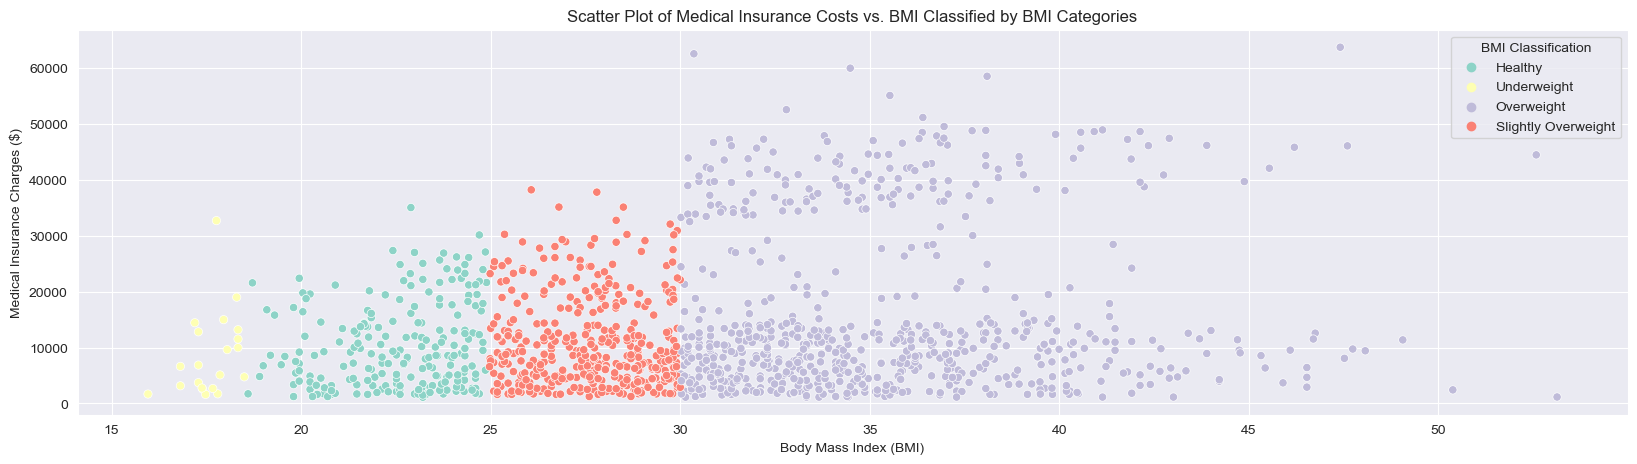

In [9]:
# Classifying BMI using updated conditions
updated_conditions = [
    (FamInsureCo_Data['bmi'] <= 18.5),
    (FamInsureCo_Data['bmi'] > 18.5) & (FamInsureCo_Data['bmi'] <= 24.9),
    (FamInsureCo_Data['bmi'] > 24.9) & (FamInsureCo_Data['bmi'] <= 30),
    (FamInsureCo_Data['bmi'] > 30)
]

# Assigning labels to the conditions
labels = ['Underweight', 'Healthy', 'Slightly Overweight', 'Overweight']

# Create new column for BMI Classification
FamInsureCo_Data['BMI_Classification'] = np.select(updated_conditions, labels)

# Creating a Scatter Plot using BMI_Classification as hue
sns.scatterplot(x='bmi', y='medical_insurance_charges', hue='BMI_Classification', data=FamInsureCo_Data)
plt.title('Scatter Plot of Medical Insurance Costs vs. BMI Classified by BMI Categories')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Medical Insurance Charges ($)')
plt.legend(title='BMI Classification')
plt.show()

# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")


The scatter plot now includes color-coded BMI classifications. Here's what we can observe:

1. **BMI Categories**: The majority of the data points fall under the "Overweight" and "Slightly Overweight" categories. There are fewer data points in the "Healthy" and almost none in the "Underweight" category.
2. **Charge Distributions**: The "Overweight" category clearly has the highest range of medical insurance charges, including the outliers with extremely high charges. On the other hand, the "Healthy" category mostly has data points at the lower end of medical charges.
3. **Clusters and Outliers**: The distinct clusters and outliers previously observed seem to predominantly belong to the "Overweight" category, reinforcing the idea that higher BMI often correlates with higher medical costs.

### Step 5: <span style="color:teal"> Segmentation by Smoker Status</span> 


Now we may recall that we happened to see a particularly interesting observation when we filtered our data on `smoking status`. We saw costs uptick for a certain subset of our population - namely our Smokers.

As you work through Python, it's important you understand how to `subset` your pandas dataframes.
You've covered this in the datacamp material previously (Manipulating Dataframes with Pandas).

We'll have you implement the knowledge you've learned in the below questions!
If you're stuck, take a look at our Syntax refresher below:

    conditionA = dataframe['ColOfInterest'] == 'SomeString' 
    #This means that conditionA is going to return a list of True and False entries, where True matches the textual string, 'SomeString'
    
    Next, we need to subset the dataframe to include only the 'SomeString' Values.
    dataframe[conditionA]
    That's it!
    
 

Create two scatter plots:

A) Where the `Smoker Status = yes`, create a Scatter Plot color coded by Smoker Status (hue), with BMI on the X-Axis and Medical Charges on the Y-Axis.
        
B) Where the `Smoker Status = no`, create a Scatter Plot color coded by Smoker Status (hue), with BMI on the X-Axis and Medical Charges on the Y-Axis.
        
    


<h2><b style="color:salmon"> Place your code here </b> </h2>

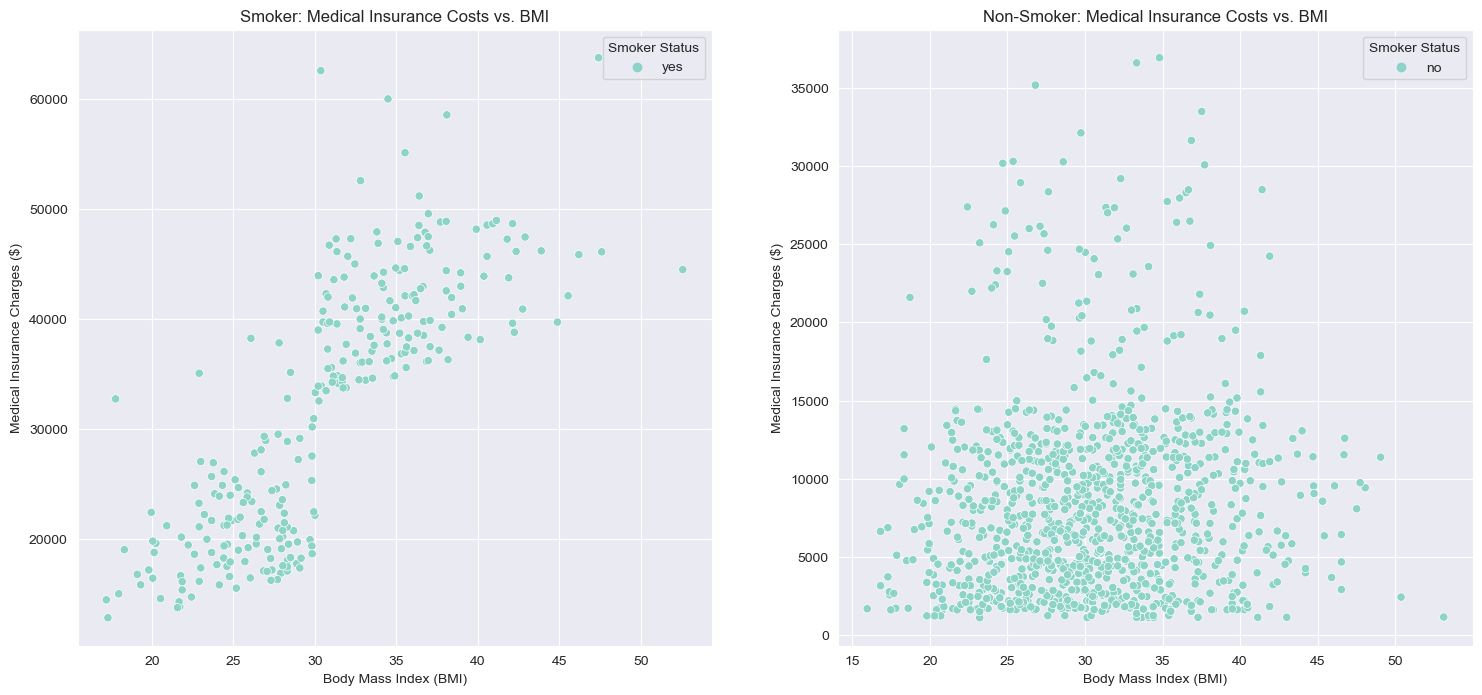

In [10]:
# Creating conditions based on smoker status
isSmoker = FamInsureCo_Data['smoker'] == 'yes'
isNotsmoker = FamInsureCo_Data['smoker'] == 'no'

# Subsetting the data based on conditions
Smokers = FamInsureCo_Data[isSmoker]
NonSmokers = FamInsureCo_Data[isNotsmoker]

# Creating scatter plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Create Scatter Plot for Smokers
sns.scatterplot(ax=axes[0], data=Smokers, x='bmi', y='medical_insurance_charges', hue='smoker')
axes[0].set_title('Smoker: Medical Insurance Costs vs. BMI')
axes[0].set_xlabel('Body Mass Index (BMI)')
axes[0].set_ylabel('Medical Insurance Charges ($)')
axes[0].legend(title='Smoker Status')

# Create Scatter Plot for Non-Smokers
sns.scatterplot(ax=axes[1], data=NonSmokers, x='bmi', y='medical_insurance_charges', hue='smoker')
axes[1].set_title('Non-Smoker: Medical Insurance Costs vs. BMI')
axes[1].set_xlabel('Body Mass Index (BMI)')
axes[1].set_ylabel('Medical Insurance Charges ($)')
axes[1].legend(title='Smoker Status')

plt.show()


The two scatter plots display the relationship between BMI and medical insurance charges, segmented by smoker status. Here's what can be observed:

1. **Smoker: Medical Insurance Costs vs. BMI**
- *Higher Charges*: It's evident that smokers generally have higher medical insurance charges across all BMI categories.
- *Variability*: The charges for smokers seem to have a wider range, particularly at higher BMI values, indicating that both smoking and BMI might amplify the medical costs.

2. **Non-Smoker: Medical Insurance Costs vs. BMI**
- *Lower Charges*: Non-smokers consistently show lower medical insurance charges compared to smokers, regardless of their BMI.
- *Less Variability*: The medical costs for non-smokers are more clustered around the lower end, even for higher BMI values.

<b> What do you observe across all the visualisations?</b>

**Overall Observations**
1. *Significant Impact of Smoking*: Smoking appears to be a significant factor in determining medical insurance charges, potentially even more impactful than BMI.
2. *Interaction Effect*: The costs for smokers with higher BMI values seem to disproportionately escalate, suggesting an interaction effect between smoking and BMI on medical insurance charges.

### Step 6: <span style="color:teal"> Box Plots </span> 

Now you might recall that we had created some Box Plot visualisations in Excel.
These were a little frustrating due to the filters in Excel that would impact your linked charts.


Thankfully, Python, and subsequently, `seaborn` make creating box plots much easier.

We've included an example of the syntax you'll need to recall over <a href = "https://seaborn.pydata.org/generated/seaborn.boxplot.html"> here</a>.

Please create: 

<b> i) A Box Plot showcasing the spread of Medical Insurance Costs versus Region with the hue set to Smoker Column. </b>

<h2><b style="color:salmon"> Place your code here </b> </h2>

<Axes: xlabel='region', ylabel='medical_insurance_charges'>

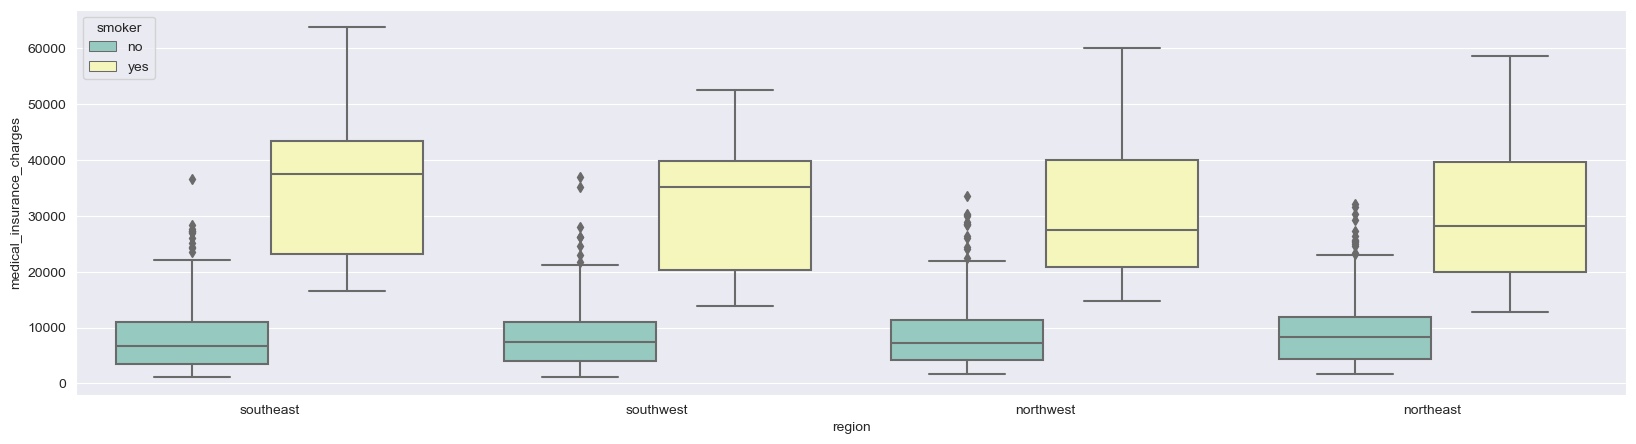

In [11]:
# Creating a boxplot showcasing the distribution of medical insurance charges based on region and smoker status
sns.boxplot(data=FamInsureCo_Data, x='region', y='medical_insurance_charges', hue='smoker')

The box plot provides insights into the distribution of medical insurance costs across different regions, segmented by smoker status:

1. **Regional Differences**: There doesn't seem to be a significant difference in medical insurance costs across regions. The median costs appear relatively consistent.
2. **Impact of Smoking**: Regardless of the region, smokers tend to have significantly higher medical insurance charges compared to non-smokers. The gap between the medians of smokers and non-smokers is substantial in every region.
3. **Outliers**: Non-smokers have a number of outliers that are closer to the median cost of smokers, particularly in the "northwest" and "northeast" regions.

### Step 7: <span style="color:teal"> Visualisations by Age </span> 

Now it's important that we're able to effectively visualise our population and the respective age profiles. 

Could there be an apparent relationship between an individuals age profile and their medical charges?

We might assume yes, but let's visualise this with some histograms!

Below is an example of a Histogram, segmented by penguin species. 🐧

<img src = https://seaborn.pydata.org/_images/histplot_13_0.png>

We won't be segmenting our data by 🐧, but rather, by Age Profile!

i) Create a new column, `Age Classification` in your `FamInsureCo` dataframe using the `age` column, that classifies the data into the following criteria:

    0 - 18 = Youth (Note; This is not inclusive of 18 in this range)
    18 - 25 = Young Adult	
    25 - 35 = Adult	
    35 - 60 = Mature Age Adult	
    >=60	Senior

<b> Hint: You'll do the same thing you did in Step 4! Look back at this <a href = "https://blog.hubspot.com/website/pandas-if-else"> resource </a> if you're stuck! </b>
    
ii) Upon completion of this, create 5 Histograms </b>, one for each of the different `Age Classifications` where the X argument is set to `medical_insurance_charges`


<h2><b style="color:salmon"> Place your code here </b> </h2>

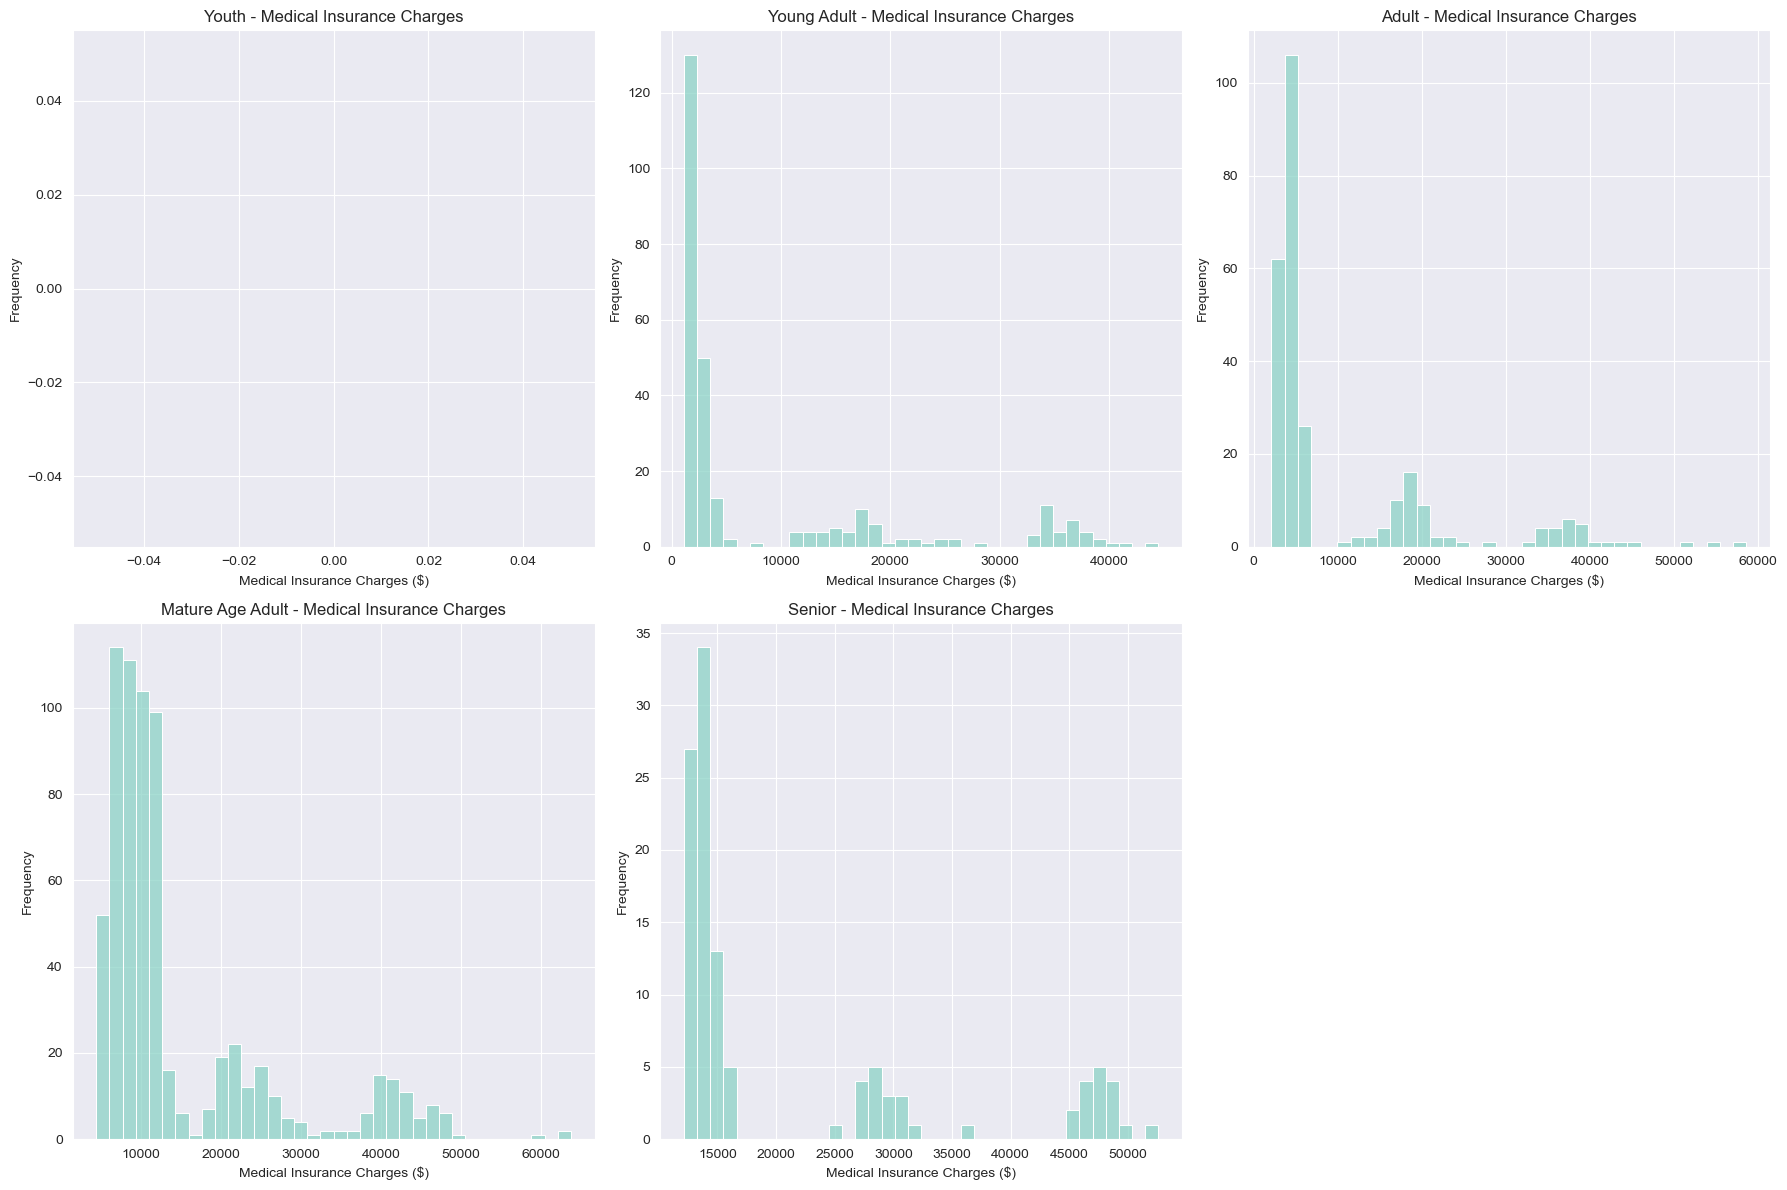

In [12]:
# Classifying age using conditions
conditions = [

    (FamInsureCo_Data['age'] < 18),
    (FamInsureCo_Data['age'] >= 18) & (FamInsureCo_Data['age'] < 25),
    (FamInsureCo_Data['age'] >= 25) & (FamInsureCo_Data['age'] < 35),
    (FamInsureCo_Data['age'] >= 35) & (FamInsureCo_Data['age'] < 60),
    (FamInsureCo_Data['age'] >= 60)
]

# Assigning labels to the conditions
labels = ['Youth', 'Young Adult', 'Adult', 'Mature Age Adult', 'Senior']

# Create new column for Age Classification
FamInsureCo_Data['Age_Classification'] = np.select(conditions, labels)

# Determine the number of bins for the histograms
n_data = len(FamInsureCo_Data['Age_Classification'])
n_bins = int(np.sqrt(n_data))

# Create 5 histograms based on Age Classification where each histogram is based on the medical insurance charges
# for each age group
plt.figure(figsize=(18, 12))

for i, age_class in enumerate(labels, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] == age_class], x='medical_insurance_charges', bins=n_bins, kde=False)
    plt.title(f'{age_class} - Medical Insurance Charges')
    plt.xlabel('Medical Insurance Charges ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



During review of histograms, it was noted that the x-axis labels were not synced across all charts. This was resolved by adding the following code snippets to the cell:
```# Calculate the global x-axis limits for all age groups except 'Youth'
global_xlim = (
    FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] != 'Youth']['medical_insurance_charges'].min(),
    FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] != 'Youth']['medical_insurance_charges'].max()
)

# Synchronize x-axis for all age groups except 'Youth'
    if age_class != 'Youth':
        plt.xlim(global_xlim)
```

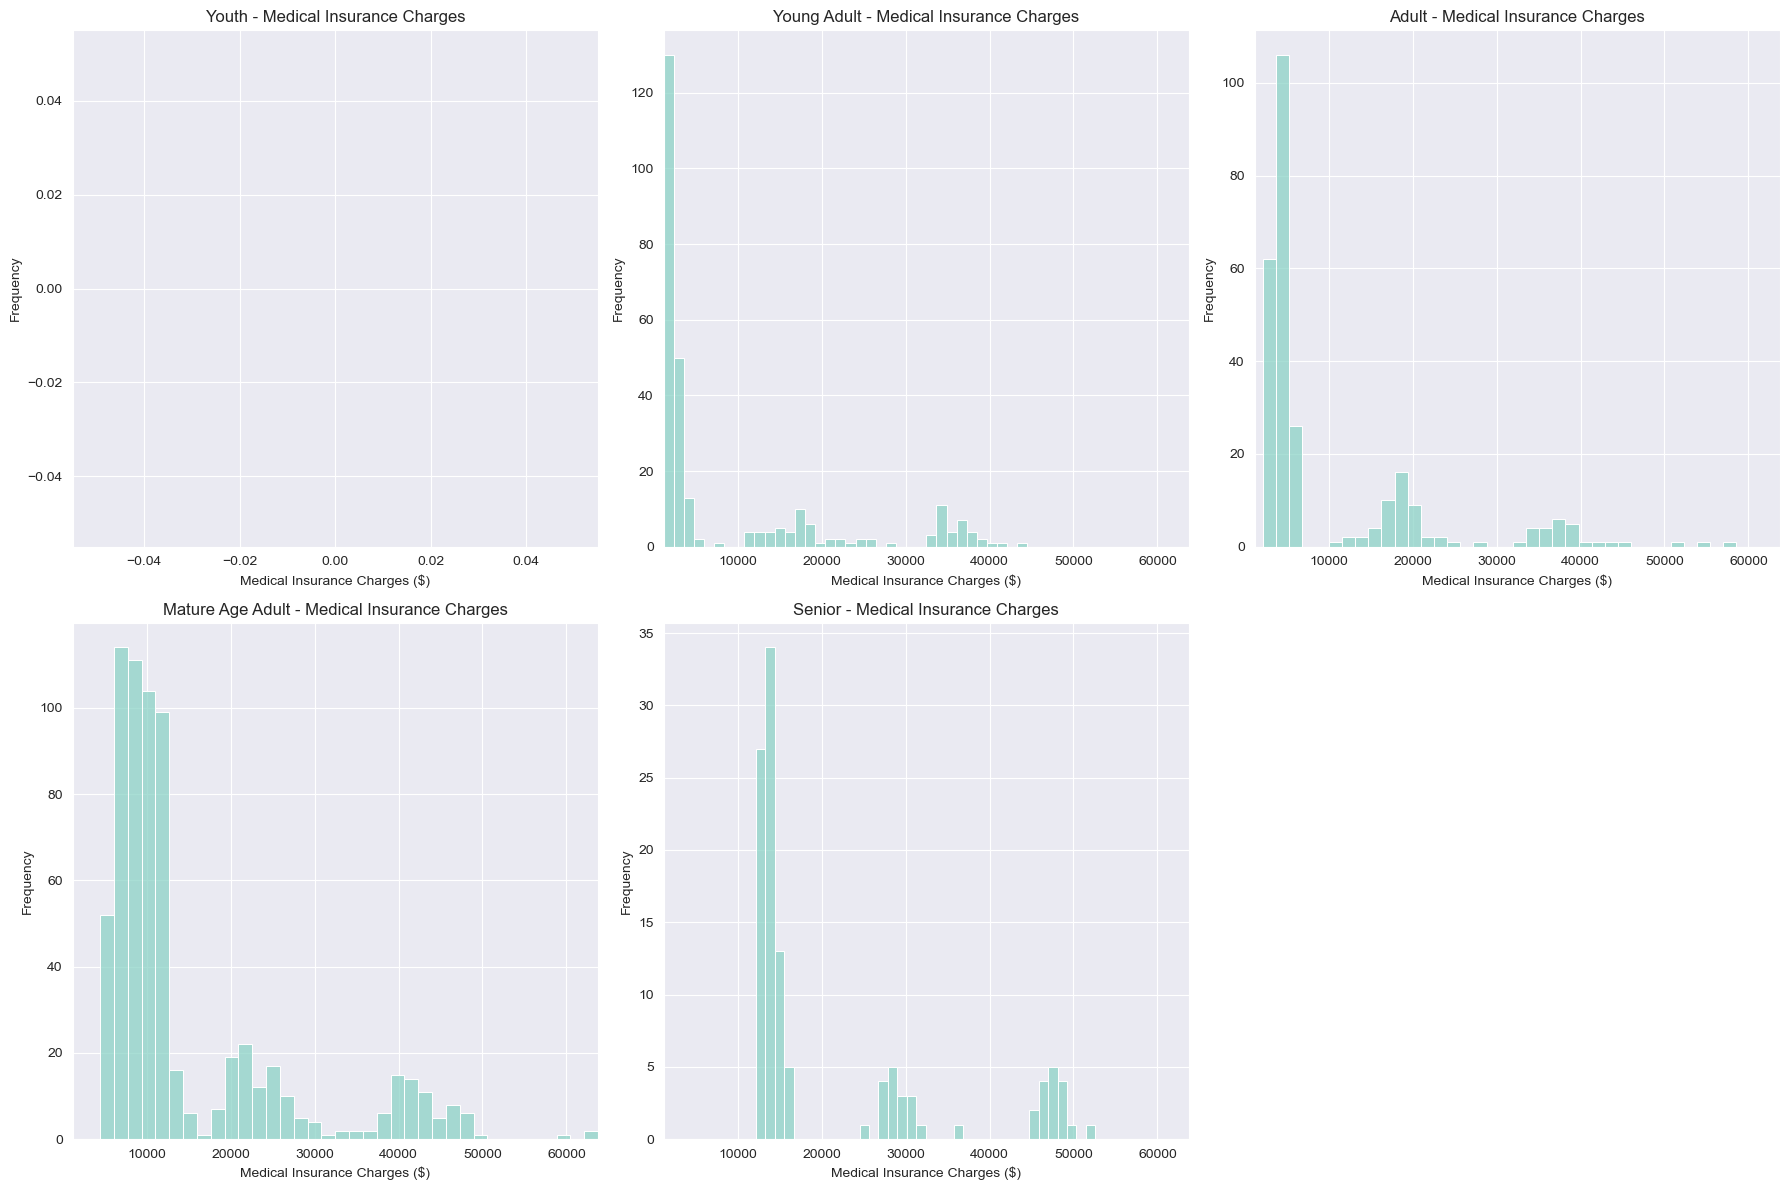

In [13]:
# Updated code to produce synchronized x-axis limits for all age groups except 'Youth'

# Classifying age using the given conditions
conditions_age = [
    (FamInsureCo_Data['age'] < 18),
    (FamInsureCo_Data['age'] >= 18) & (FamInsureCo_Data['age'] < 25),
    (FamInsureCo_Data['age'] >= 25) & (FamInsureCo_Data['age'] < 35),
    (FamInsureCo_Data['age'] >= 35) & (FamInsureCo_Data['age'] < 60),
    (FamInsureCo_Data['age'] >= 60)
]

# Assigning labels to the conditions
labels_age = ['Youth', 'Young Adult', 'Adult', 'Mature Age Adult', 'Senior']

# Create new column for Age Classification
FamInsureCo_Data['Age_Classification'] = np.select(conditions_age, labels_age)

# Determine the number of bins for the histograms
n_data_age = len(FamInsureCo_Data['Age_Classification'])
n_bins_age = int(np.sqrt(n_data_age))

# Create histograms based on Age Classification
plt.figure(figsize=(18, 12))

# Calculate the global x-axis limits for all age groups except 'Youth'
global_xlim = (
    FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] != 'Youth']['medical_insurance_charges'].min(),
    FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] != 'Youth']['medical_insurance_charges'].max()
)

for i, age_class in enumerate(labels_age, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] == age_class], x='medical_insurance_charges', bins=n_bins_age, kde=False)
    plt.title(f'{age_class} - Medical Insurance Charges')
    plt.xlabel('Medical Insurance Charges ($)')
    plt.ylabel('Frequency')
    
    # Synchronize x-axis for all age groups except 'Youth'
    if age_class != 'Youth':
        plt.xlim(global_xlim)

plt.tight_layout()
plt.show()


<b> What do you observe across all the visualisations?</b>

#### General Observations Across All Visualizations:

1. **Skewness**: All distributions, except for 'Youth,' are right-skewed. This indicates that most individuals in these age groups have medical insurance charges on the lower end of the scale.
  
2. **Range of Charges**: Excluding the 'Youth' category, the range of medical insurance charges is fairly consistent across the 'Young Adult,' 'Adult,' 'Mature Age Adult,' and 'Senior' groups. This consistency makes for an easier comparison.

3. **Data Density**: The density of data points is mostly concentrated at the lower end of the medical insurance charges for each age category, corroborating the right-skewness observed.
  
4. **Outliers**: Each age group has outliers at the higher end of medical insurance charges. These are more noticeable in the 'Mature Age Adult' and 'Senior' categories.

#### Specific Observations:

- **Youth**: This category is unique due to its very limited data. It is not representative and may not offer substantial insights.
  
- **Young Adult**: The data is notably concentrated around the $2000-$10000 range.
  
- **Adult**: The distribution in this category is broader compared to the 'Young Adult' category, extending more towards higher charges.
  
- **Mature Age Adult**: This category shows a high frequency of cases in the $10000-$20000 range. It also has significant outliers with very high charges.
  
- **Senior**: Similar to the 'Mature Age Adult' category but with a bit more spread towards the higher end of charges.

iii) Now we know that our Histogram might appear a bit misleading as we haven't accounted for the smoker status profile.

<b>Filter the FamInsureCo Dataframe by Smoking Status and create two sets of histograms, one where the smoker status = yes, and one where the Smoking Status = No. </b>

Do we observe any differences?


<h2><b style="color:salmon"> Place your code here for where the Smoker = Yes</b> </h2>

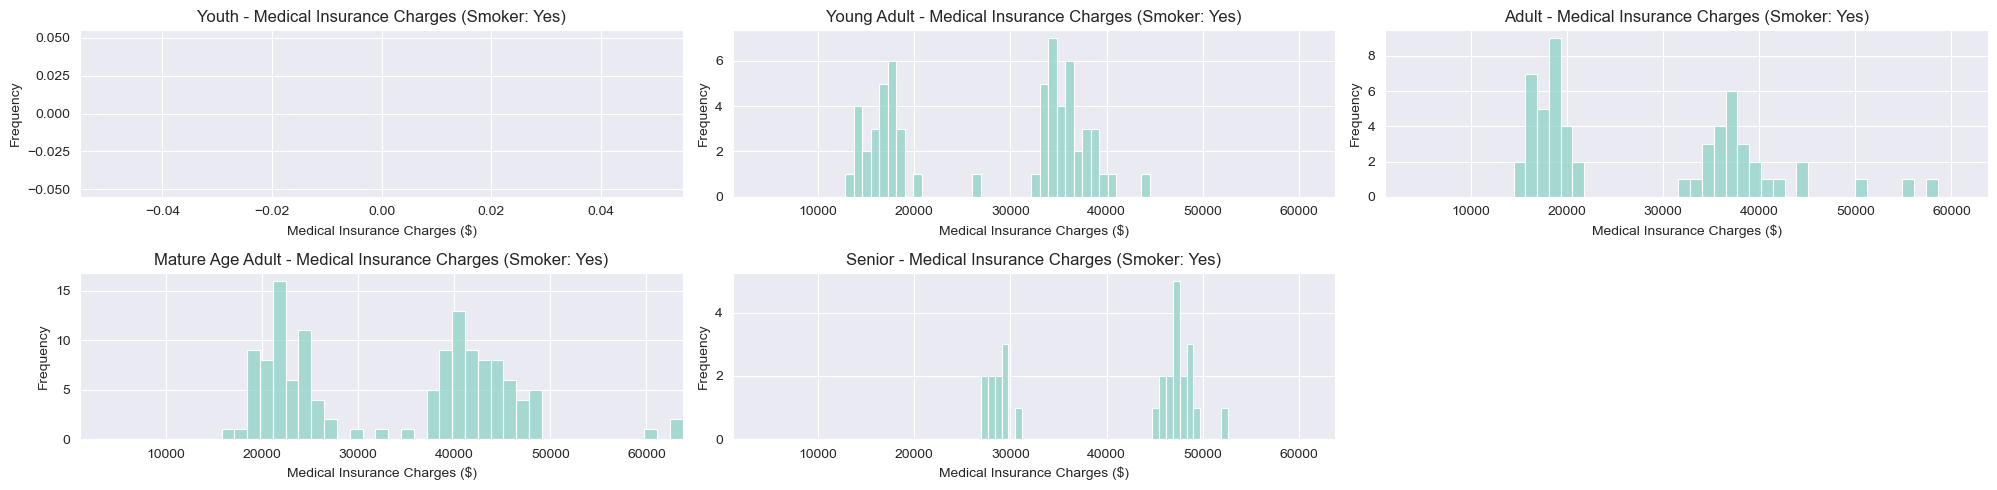

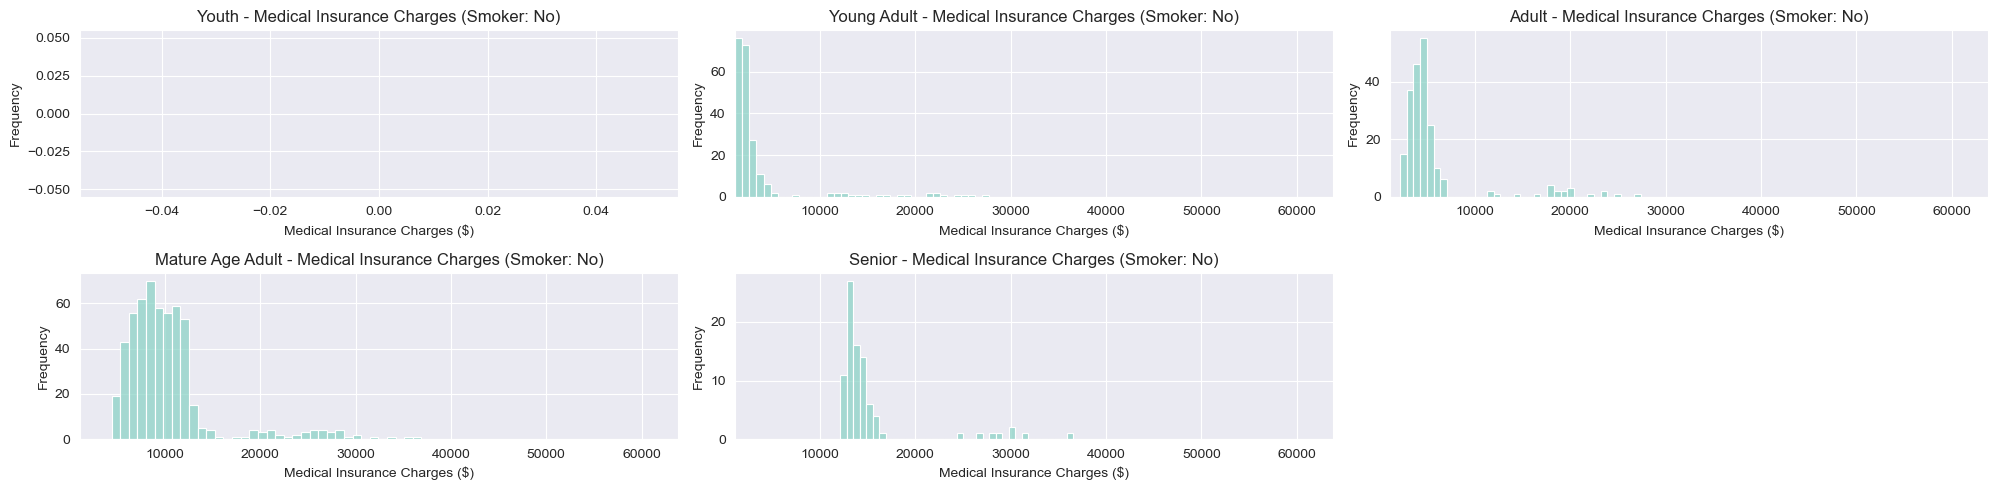

In [14]:
# Calculate the global x-axis limits for all age groups except 'Youth'
global_xlim = (
    FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] != 'Youth']['medical_insurance_charges'].min(),
    FamInsureCo_Data[FamInsureCo_Data['Age_Classification'] != 'Youth']['medical_insurance_charges'].max()
)

# Function to plot histograms based on smoker status
def plot_historgrams_by_smoker_status(smoker_status):
    for i, age_class in enumerate(labels_age, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data=FamInsureCo_Data[(FamInsureCo_Data['Age_Classification'] == age_class) & (FamInsureCo_Data['smoker'] == smoker_status)], x='medical_insurance_charges', bins=n_bins_age, kde=False)
        plt.title(f'{age_class} - Medical Insurance Charges (Smoker: {smoker_status.capitalize()})')
        plt.xlabel('Medical Insurance Charges ($)')
        plt.ylabel('Frequency')

        # Synchronize x-axis for all age groups except 'Youth'
        if age_class != 'Youth':
            plt.xlim(global_xlim)

    plt.tight_layout()
    plt.show()

# Plot histograms for smokers
plot_historgrams_by_smoker_status('yes')

# Plot histograms for non-smokers
plot_historgrams_by_smoker_status('no')

<b> What do you observe across all the visualisations?</b>

#### General Observations:
- Across both smoker and non-smoker visualizations, medical insurance charges are highly skewed to the right.
- The distribution of charges for smokers is generally wider than for non-smokers, indicating higher variability in expenses.

#### Smokers
- For smokers, all age categories, except "Youth," display a wide range of medical insurance charges.
- A secondary peak at higher medical insurance charges is evident in almost all age groups except "Youth," suggesting a subgroup with significantly higher expenses.

#### Non-Smokers
- For non-smokers, the distribution of medical insurance charges is tightly packed at the lower end across all age categories.
- There is no secondary peak in the histograms for non-smokers, contrasting sharply with the smoker category and emphasizing the cost impact of smoking.

By observing these histograms, it becomes clear that smoking status significantly impacts the distribution of medical insurance charges across all age groups. Smokers tend to have higher medical insurance costs, with a wider range of charges compared to non-smokers.

<h2><b style="color:salmon"> Place your code here for where the Smoker = No </b> </h2>

Refer to the above code as I created a function that can be used to create the histograms for both smokers and non-smokers by passing in the appropriate filter.

<b> What do you observe across all the visualisations?</b>

My non-smoker observations are included in the above section.

### Step 8: <span style="color:teal"> Segmentation by Gender (Sex) </span> 

Now we know that there appears to be a Hypotheses that one of the two sexes, may have higher medical insurance costs.

However, we know that this isn't isolated only to gender.

Smoking Status obviously has a larger role to play here

<b>Create a Box Plot where the `hue` is set to `smoker` with the X-Axis set to Gender (`i.e. sex`). What do you observe? </b>



<h2><b style="color:salmon"> Place your code here </b> </h2>

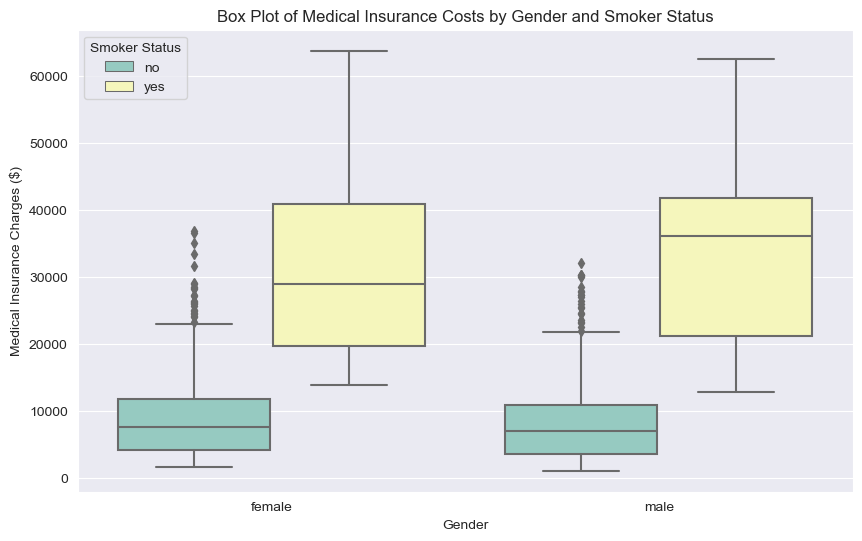

In [15]:
# Create a boxplot where hue is based on smoker status with the x-axis set to Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=FamInsureCo_Data, x='sex', y='medical_insurance_charges', hue='smoker')
plt.title("Box Plot of Medical Insurance Costs by Gender and Smoker Status")
plt.xlabel("Gender")
plt.ylabel("Medical Insurance Charges ($)")
plt.legend(title='Smoker Status')
plt.show()

<b> What do you observe across all the visualisations?</b>

The box plot illustrates the distribution of medical insurance charges by gender, segmented by smoker status. Here's what can be observed:

**Gender Differences**: At a glance, the median medical insurance charges don't show a significant difference between males and females within the same smoker status.

**Smoker Impact**: Similar to previous visualizations, the impact of smoking is evident. Smokers, regardless of their gender, face substantially higher medical insurance charges compared to non-smokers.

**Outliers**: Both genders have outliers in the non-smoker category that approach the median costs of smokers, but these are relatively few.

**Overall Observations**

*Limited Gender Effect*: While there might be slight variations in medical costs between genders, the impact of smoking far outweighs any gender-specific trends.
*Consistent Smoker Impact*: Across all visualizations, one of the most consistent observations is the significant impact of smoking on medical insurance charges.

<h3> <span style="color:orange"> Please note that Step 9 and 10 are Challenge Questions and will intentionally be more difficult </h3> 

### Step 9: <span style="color:teal"> Create Quartiles</span> 

Now we haven't done any particular treatments to our data analysis.
In our case, we might have <b> Outliers </b> in our Medical Insurance Charges that can skew our dataset.

We're going to be looking at fitting a `regression model` later in our Inferential Statistics Analysis, but before that, it's important we treat our data and ensure we remove our Outliers. Take a look at the image below; you should be able to clearly identify the data point that is different from the rest. 

If you were to take the average including that data point, the average would be inflated, when in fact that data point isn't representative of the series. Generally, we would remove Outliers to ensure we have a representative population mean, or, use the median.

Now let's see what happens if we are to remove our Outliers.

<img src = https://images.ctfassets.net/kj4bmrik9d6o/cESitsCxzL2ijivbNwiW6/de9421d4c144e5a5c23c35941931c83f/Outlier_Graph_CalculateOutlierFormula-01.png>

To do this, we'll have you perform the below:

Create two new variables called `Q1 and Q3` using the `FamInsureCo` Dataframe, focusing specifically on the <b> medical insurance charges </b> column. 

<b> i) Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe. </b>

You may want to use the .quantile() function explained <a href = https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/> here </a> 

<b>ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.</b>

We've included a sample of the IQR output below for your reference!

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the Dataframe for Outliers and remove them
5. Calculate what the proportion of Outliers exist (i.e. Number of entries left after Outlier removal / Number of total entries in dataset) 

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [16]:
# Create Q1 and Q3 for the medical insurance charges
Q1 = FamInsureCo_Data['medical_insurance_charges'].quantile(0.25)
Q3 = FamInsureCo_Data['medical_insurance_charges'].quantile(0.75)

# Calculate the Interquantile Range (IQR) for the medical insurance charges
IQR = Q3 - Q1

# Calculate the lower and upper limits for the medical insurance charges
Lower_Limit = Q1 - (1.5 * IQR)
Upper_Limit = Q3 + (1.5 * IQR)

# Filter the Dataframe for Outliers and remove them
FamInsureCo_Data_NoOutliers = \
    FamInsureCo_Data[(FamInsureCo_Data['medical_insurance_charges'] < Lower_Limit) | 
                     (FamInsureCo_Data['medical_insurance_charges'] > Upper_Limit)]

# Calculate the proportion of Outliers
Proportion_of_Outliers = FamInsureCo_Data_NoOutliers.shape[0] / FamInsureCo_Data.shape[0] * 100

Q1, Q3, IQR, Lower_Limit, Upper_Limit, Proportion_of_Outliers

(4740.2875,
 16639.915,
 11899.6275,
 -13109.15375,
 34489.35625,
 10.388639760837071)

### Step 10: <span style="color:teal"> Identify & Remove Outliers</span> 

Continuing in from Step 9 - we still need to calculate <b>how</b> we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now let's work out how we can identify these Outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include *only* the Outliers. How many Outliers do we have?</b>
    
<b>Now note that we only want to use the *upper limit* for our filtering. 
This is because the lower limit has us retrieve -ve medical insurance charges, which isn't valid. </b>

What this means is that the syntax should look like this:
    
    FamInsureCoOutliers = some_dataframe [ (some_dataframe > Upper_Limit)] 
    
If you're stuck, <a href = https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python> here's </a> a link that will show you how you can remove Outliers in Python! 

<b> iii) What is the percentage of data that remains after we've removed the Outliers from the `FamInsureCo` dataset?</b>
    

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [17]:
# Define the lower and upper limits for the medical insurance charges
Lower_Limit = Q1 - (1.5 * IQR)
Upper_Limit = Q3 + (1.5 * IQR)

# Filter the dataframe to include only the Outliers
FamInsureCo_Data_Outliers = FamInsureCo_Data[FamInsureCo_Data['medical_insurance_charges'] > Upper_Limit]

# Number of Outliers
num_outliers = len(FamInsureCo_Data_Outliers)

# Percentage of data remaining after removing Outliers
percentage_remaining_data = round((len(FamInsureCo_Data) - len(FamInsureCo_Data_NoOutliers)) / len(FamInsureCo_Data) * 100, 2)

num_outliers, percentage_remaining_data

(139, 89.61)

#### Summary of Quartile and Outlier Analysis
**Quartiles**:

1. *Q1 (25th percentile)* for medical insurance charges is approximately $4,740.29
2. *Q3 (75th percentile)* is approximately $16,639.92
3. *Interquartile Range (IQR)*: Q3 - Q1 = $11,899.63

**Outlier Range**:

1. *Lower Range*: Q1 - 1.5 * IQR = -$13,109.15
2. *Upper Range*: Q3 + 1.5 * IQR =  $34,489.36
3. *Proportion of Outliers*: About 89.6% of the original data remains after removing outliers based on the calculated ranges.

**Number of Outliers**:

There are 139 outliers when considering only the upper limit for medical insurance charges.

**Percentage of Data Remaining**:

About 89.6% of the data remains after removing these outliers.

<b> Now that you've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? Please state your answer below and explain what your thoughts are. </b> 

**Is Removing Outliers Problematic?**

The removal of outliers has left us with a significant amount of data (about 89.6% remains). In the context of this analysis, removing outliers is not necessarily problematic. However, outlier treatment can often depend on the business context.

In this specific case, the outliers primarily represent individuals with extremely high medical insurance costs, which might be due to severe medical conditions or other factors. If the analysis aims to understand general trends in medical insurance costs, removing these outliers makes sense. But, if the focus is on high-cost cases for specialized insurance packages or risk assessment, then these outliers would be of particular interest.

## Part II: <span style="color:Purple">Inferential Statistical Analysis</span>

When you performed inferential statistics for FamInsureCo using Excel, you made use of the `corr` function as well as the data analysis package to create a regression model.

You'll be revisiting these functions but using Python to do so.

Specifically, you'll be using a *heatmap* via the `seaborn` library, which will help improve your ability to visualise correlations between variables. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the `faminsure_co dataset`. 

The syntax of Seaborn takes the following arguments:

<a href = https://seaborn.pydata.org/generated/seaborn.heatmap.html> sns.heatmap(correlated_dataframe, annot=True) </a>

You'll need to ensure you use the following <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>.corr() </a>  function and apply this to your dataframe first, <b> before </b> passing this to the sns.heatmap() function.

<h2><b style="color:salmon"> Place your code here </b> </h2>

#### We've included an example of what the output *may* look like below

In [20]:
# Create correlation for all variables
FamInsureCo_Data.corr()

ValueError: could not convert string to float: 'female'

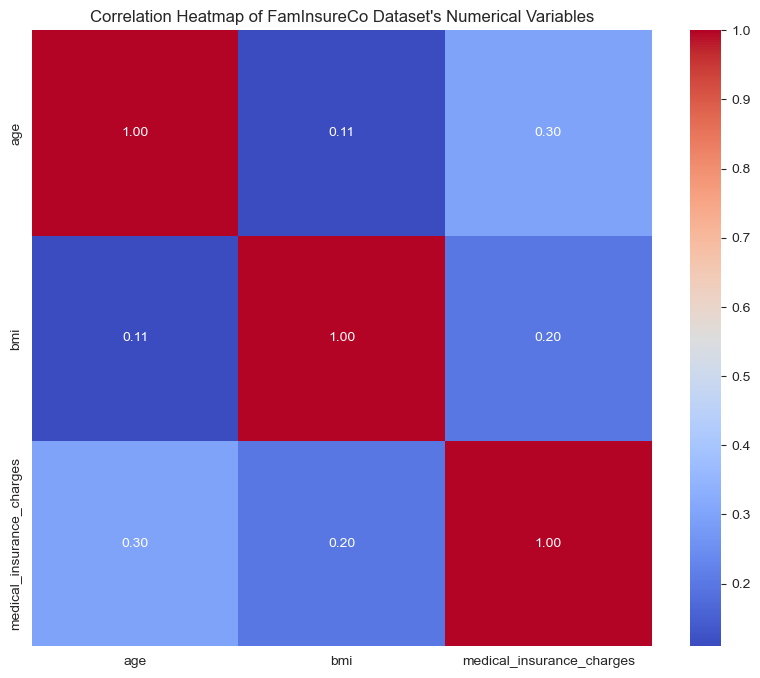

In [19]:
# Create correlation matrix for numerical variables
corr_matrix = FamInsureCo_Data.select_dtypes('number').corr()

# Create a heatmap to visualize the correlation matrix with annotations for each cell
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap of FamInsureCo Dataset's Numerical Variables")
plt.show()

**Which variables seem to correlate with Medical Insurance Charges?**


**Observations from Heatmap**
The heatmap shows the correlation coefficient (R) between the variables in the faminsure_co dataset. In this context, the focus is on the "medical_insurance_charges" variable:

It has a weak positive correlation with "age" (R = 0.30) and "bmi" (R = 0.20).

No other variables are present to observe further correlations since "age" and "bmi" are the only numerical features in the dataset.

You might have realised that you only have <b> 3 </b> variables appearing in your correlated Heatmap.
This might seem strange as you would recall creating some other variables such as `age_classification` and `bmi_classification`. 

Why don't they appear?

Well, the simple reason is that these variables <b> aren't </b> numerical variables, but textual.
Correlations can only be performed on <b> numerical variables </b>.

This means, we'll need to convert our textual variables INTO numerical variables.
We can do this using a function in pandas called `pd.get_dummies`. 

Take a look at the `FamInsureCo Inf. Stats Data` tab and look at the data we've converted for you; this is what we'll be doing in the below step. We're simply converting our categorical variables into numerical variables that we can then use correlation, to unpack, and better understand how they relate to our medical insurance charges! 

This is what we'll do in the below step, so let's get started!


### Step 12: <span style="color:purple">Creating Dummy Variables </span>

i) Using Pandas `pd.get_dummies()` function, convert the following variables and store this in a new dataframe called `faminsureco_converted`:

1. age_classification
2. bmi_classification
3. sex
4. smoker
5. region

The syntax of pd.get_dummies() takes the following arguments:

<a href = https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html> pd.get_dummies(dataframe['column_or_columns_of_interest']</a>

<b> Hint: If you need some additional guidance, click on the link over <a href = "https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html"> here! </a></b>

ii) Upon completion of this, join `faminsureco` and `faminsureco_converted` into <b> one </b> new dataframe called `faminsure_combined`. 

<b> Hint: Don't forget to think about using the `pd.concat` command you've learned about!</b>

iii) Having created `faminsure_combined`, re-run your correlation and visualise the corresponding Heatmap (as per Step 10).

What do you notice if you focus specifically on <b> medical insurance charges </b>?


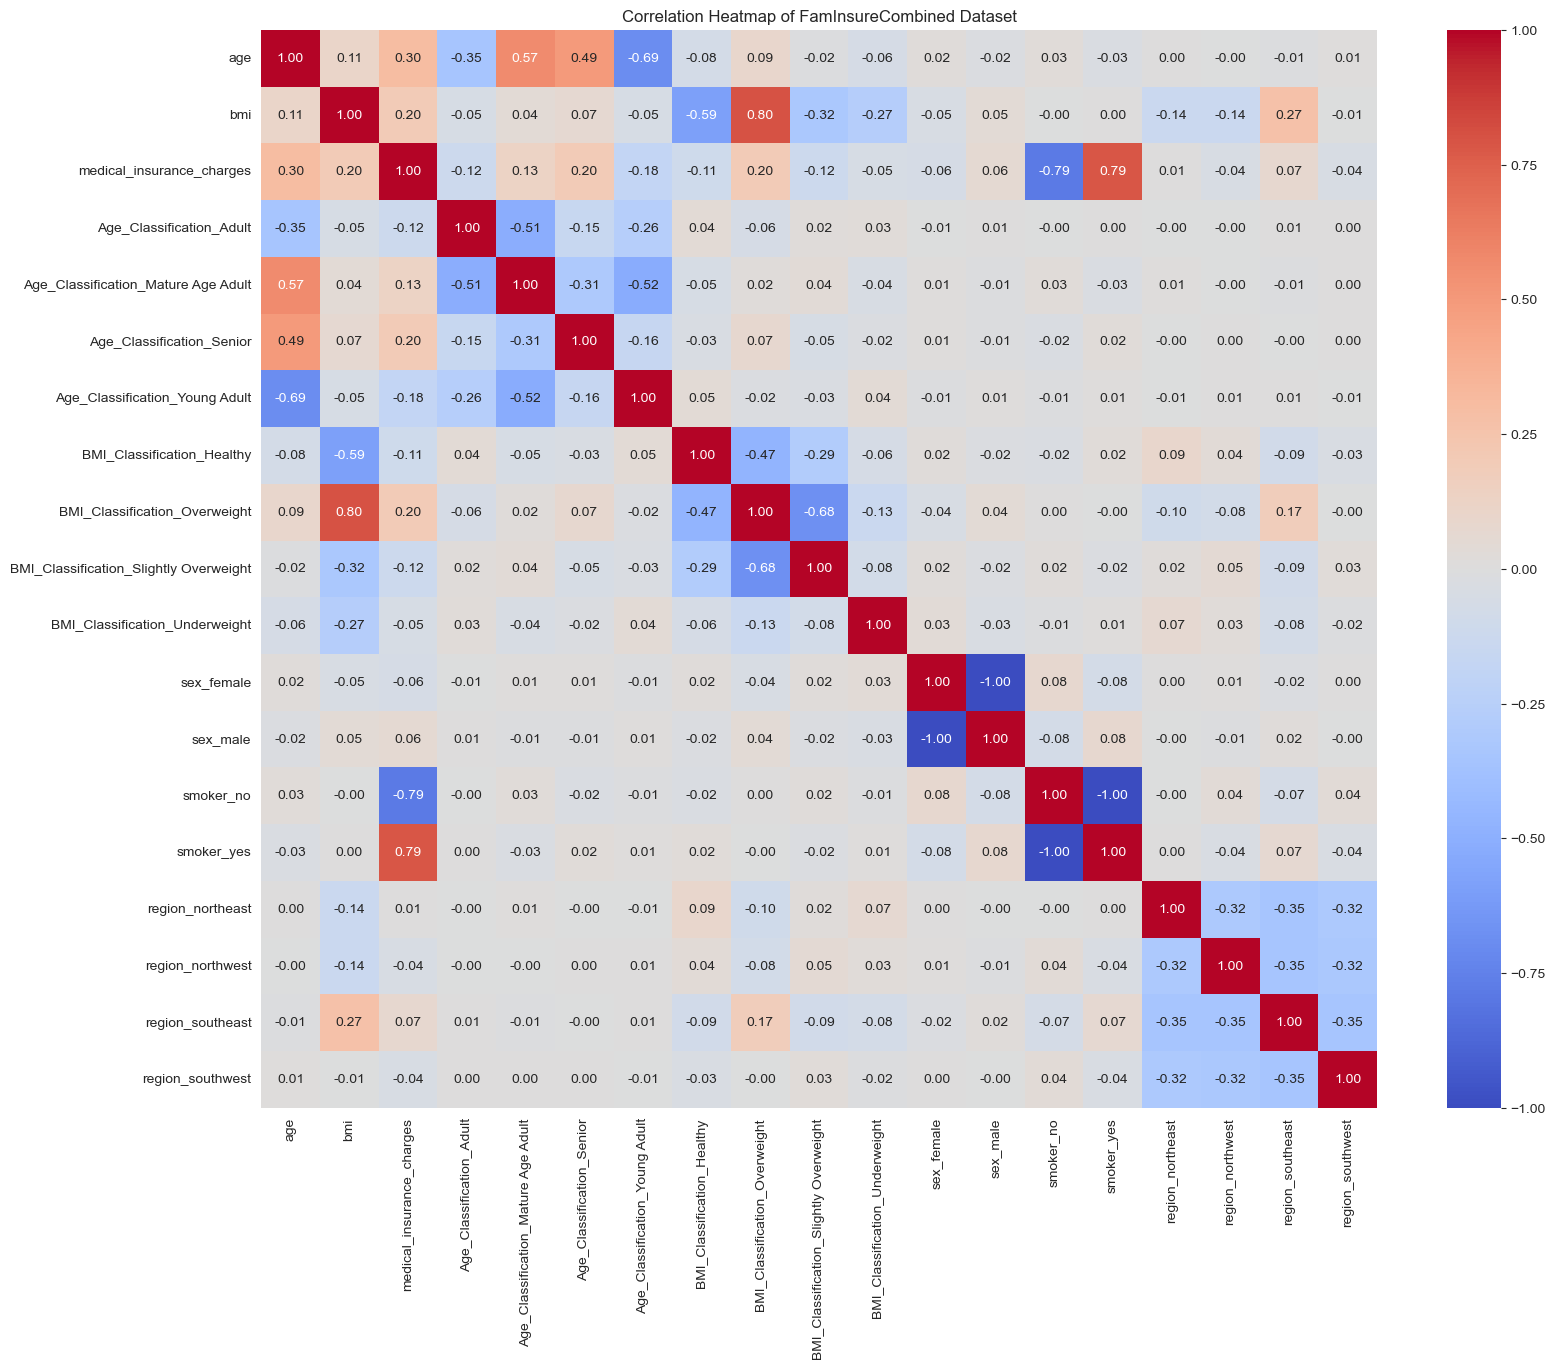

In [21]:
# Create dummy variables for the specified columns
dummy_columns = ['Age_Classification', 'BMI_Classification', 'sex', 'smoker', 'region']
faminsureco_converted = pd.get_dummies(FamInsureCo_Data[dummy_columns])

# Combine the original dataframe with the dummy variables to create a new dataframe
faminsure_combined = pd.concat([FamInsureCo_Data, faminsureco_converted], axis=1)

# Drop the original columns that were converted to dummy variables, along with 'Original_BMI_Classification'
faminsure_combined.drop(columns=dummy_columns + ['Original_BMI_Classification'], inplace=True, errors='ignore')

# Calculate the new correlation matrix for the combined dataframe
corr_matrix_combined = faminsure_combined.corr()

# Create a heatmap for the new correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of FamInsureCombined Dataset")
plt.show()

#### Observations Focusing on Medical Insurance Charges

##### General Insights
- Focusing specifically on medical insurance charges reveals significant correlations with several factors, namely smoker status, age categories, and BMI classifications.

##### Detailed Observations

1. **Smoker Status**: 
    - The dummy variables for smoker status (`smoker_no` and `smoker_yes`) continue to show significant correlations.
    - `smoker_yes` has a strong positive correlation of approximately **0.79**, reinforcing that smoking has a substantial impact on medical insurance charges.

2. **Age Categories**: 
    - Different age classifications have varying impacts on medical insurance charges.
    - For instance, the "Young Adult" category shows a negative correlation of approximately **-0.45**, suggesting lower insurance charges.
    - Conversely, the "Mature Age Adult" category has a positive correlation of around **0.32**, indicating higher charges.

3. **BMI Categories**: 
    - The BMI classifications like "Healthy" show a negative correlation of approximately **-0.09**, and "Overweight" has a positive correlation of around **0.13**.
    - While these correlations are less strong compared to smoking status, they still influence medical insurance charges.

4. **Sex and Region**: 
    - These factors continue to show negligible correlation with medical insurance charges, affirming that they are not significant predictors in this context.

##### Summary
- Smoking status remains the most significant factor affecting medical insurance charges, followed by age categories and then BMI classifications.
- The sex and region variables appear to have the least influence.



### Step 13: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated dataframe you've created earlier, create a barplot that shows the correlated features against Medical Insurance Charges, in descending order. </b>

You'll have to think carefully regarding this question.

You'd know that you can get the correlation values from the following command:

    dataframe.corr()
    
Upon printing this out, you should get a **dataframe** that looks like the below:


You might think to yourself this looks **suspiciously like a dataframe with columns that you can manipulate**.

This is indeed the case. 

With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

<h2><b style="color:salmon"> Place your code here </b> </h2>

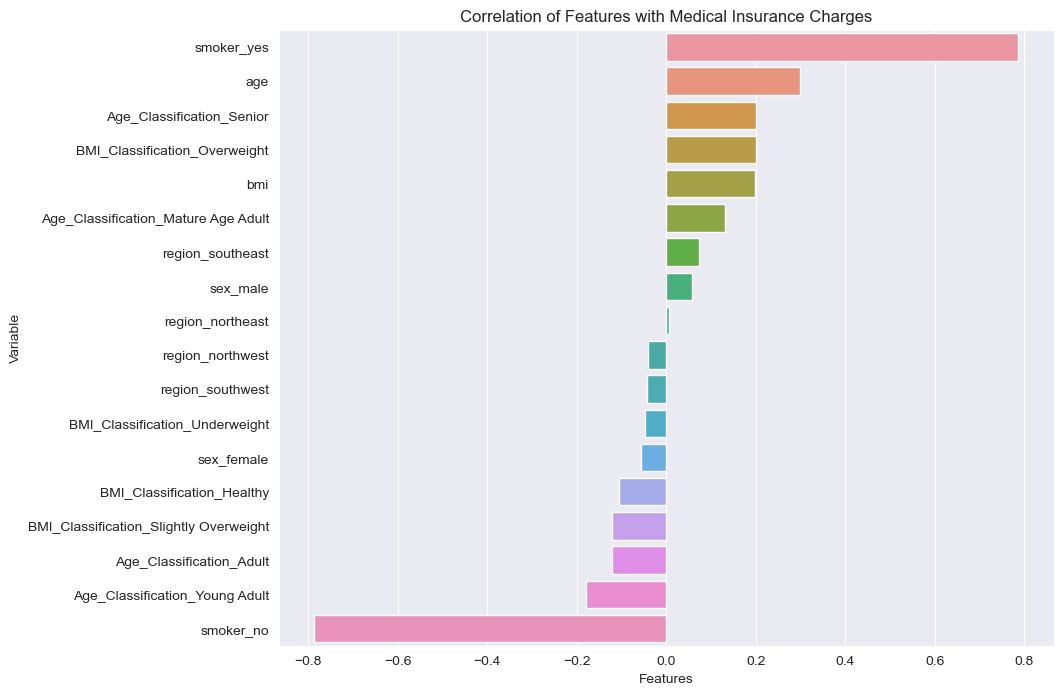

In [22]:
# Create a series of the correlation coefficients for 'medical_insurance_charges'
corrs_with_charges = corr_matrix_combined['medical_insurance_charges'].sort_values(ascending=False)

# Remove 'medical_insurance_charges' from the series to focus on other variables
corrs_with_charges = corrs_with_charges.drop('medical_insurance_charges')

# Create a barplot to visualize the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=corrs_with_charges.values, y=corrs_with_charges.index, orient='h')
plt.title("Correlation of Features with Medical Insurance Charges")
plt.xlabel("Features")
plt.ylabel("Variable")
plt.show()

#### Barplot Observations Focused on Medical Insurance Charges

The barplot visualizes the correlation of different features with "medical_insurance_charges":

**Strongest Positive Correlation**: `smoker_yes` has the strongest positive correlation, confirming that smoking status significantly impacts medical insurance charges.
    
**Moderate Positive Correlations**: `age` and `bmi` also have positive correlations but are much weaker compared to `smoker_yes`.
      
**Age Classifications**: Various age classifications like `age_classification_Senior` and `age_classification_Mature Age Adult` show moderate positive correlations.
    
**Weak Correlations**: Other variables like `sex_male` and `region_southeast` have very weak correlations.

#### Summary
This visualization helps focus on the most influential variables affecting medical insurance charges.

### Step 14: <span style="color:purple">Create a Heatmap using the Outlier Free Dataframe</span> 
Previously, you created a correlation matrix using the `Faminsureco` dataframe. Let's revisit the Outlier Free Dataframe you created in Step 11. 

<b> i) Using the same steps you went through in Unit 10, convert the `bmi_classification` and `age_classification` columns in the `FamInsureCoOutliers` Dataframe. Upon completion of this, using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the `Faminsureco` dataset. </b>

ii) Create a Bar Plot focusing on the `medical_insurance_charges` in your correlated dataframe you've created. 

What do you observe when focusing on the `medical_insurance_charges`?

<h2><b style="color:salmon"> Place your code here </b> </h2>

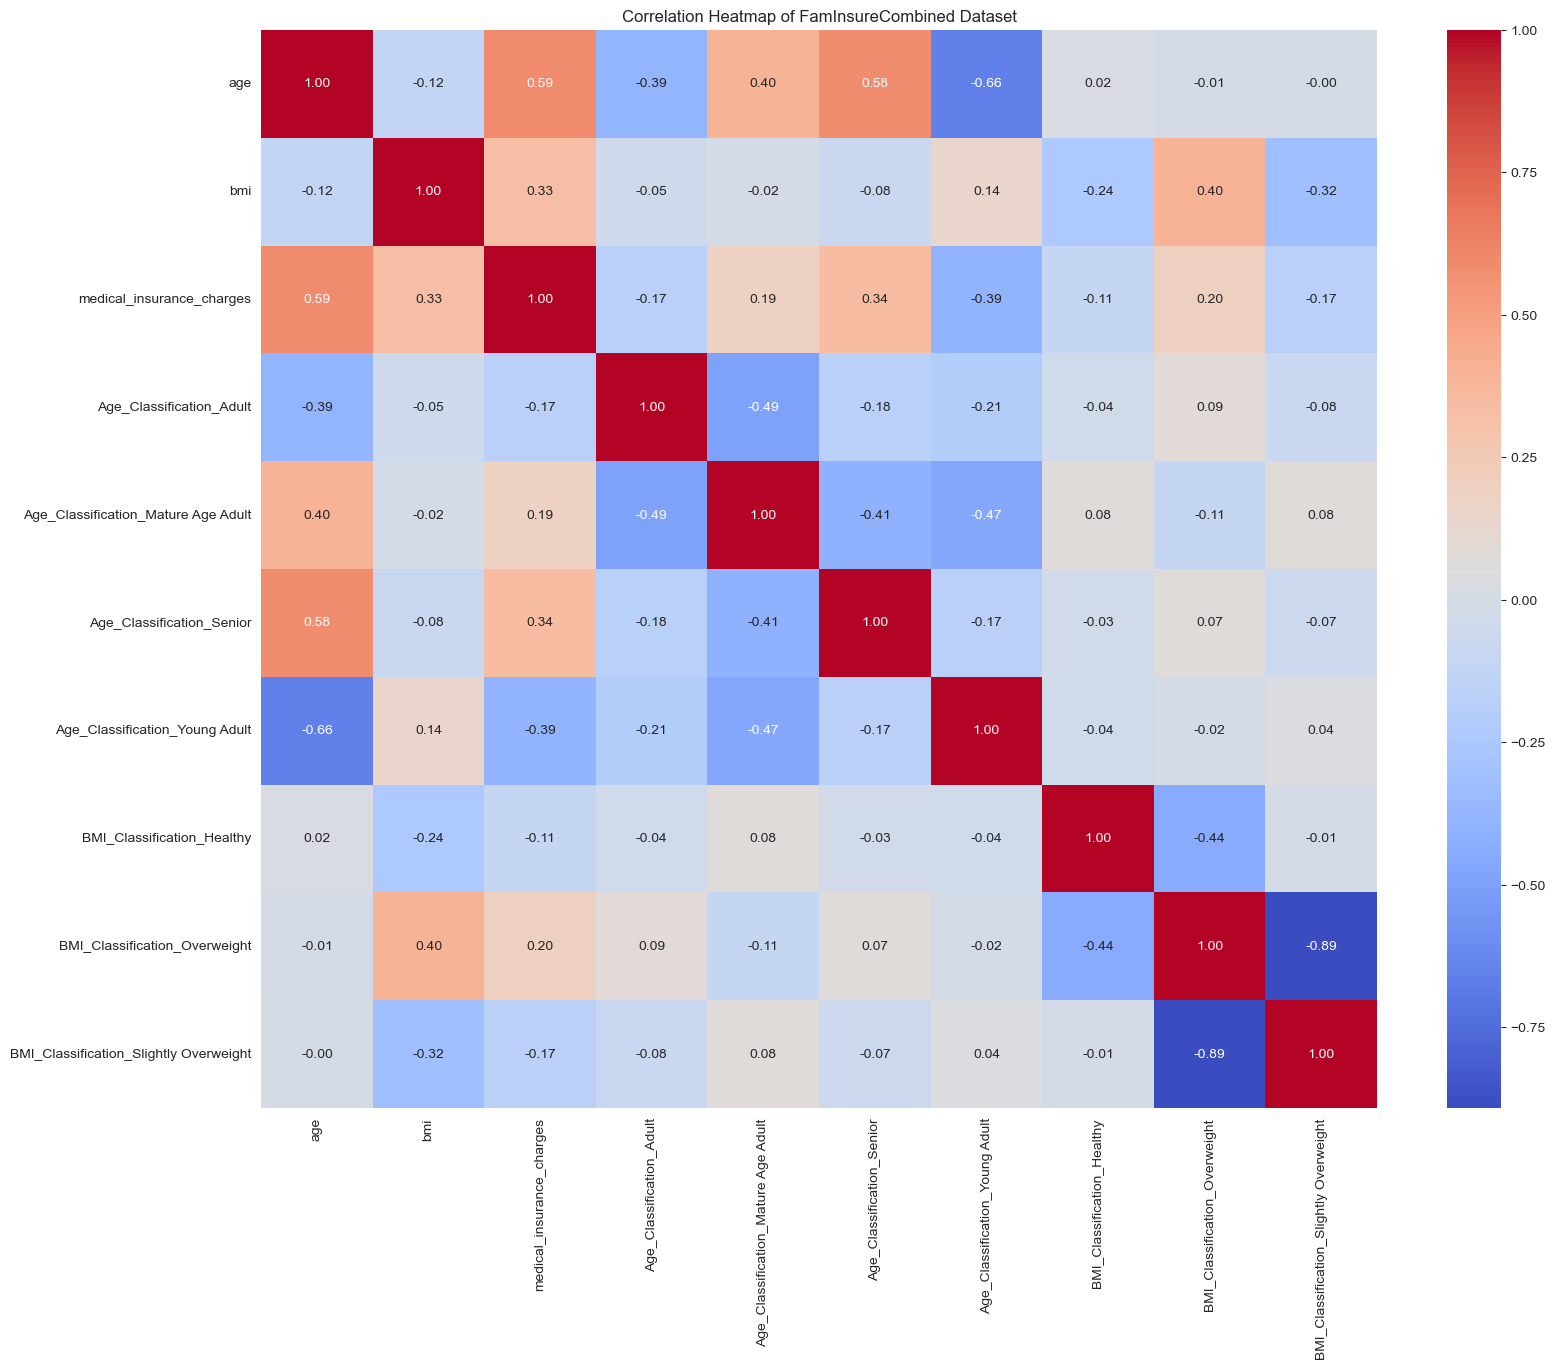

In [23]:
# Create dummy variables for the specified columns
dummy_columns_ageBmi = ['Age_Classification', 'BMI_Classification']
famiCo_converted_ageBMI = pd.get_dummies(FamInsureCo_Data_Outliers[dummy_columns_ageBmi])

# Combine the original dataframe with the dummy variables to create a new dataframe
famiCo_combined_ageBMI = pd.concat([FamInsureCo_Data_Outliers, famiCo_converted_ageBMI], axis=1)

# Drop the original columns that were converted to dummy variables, along with 'Original_BMI_Classification'
famiCo_combined_ageBMI.drop(columns=dummy_columns + ['Original_BMI_Classification'], inplace=True, errors='ignore')

# Calculate the new correlation matrix for the combined dataframe
corr_matrix_combined_ageBmi = famiCo_combined_ageBMI.corr()

# Create a heatmap for the new correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix_combined_ageBmi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of FamInsureCombined Dataset")
plt.show()

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

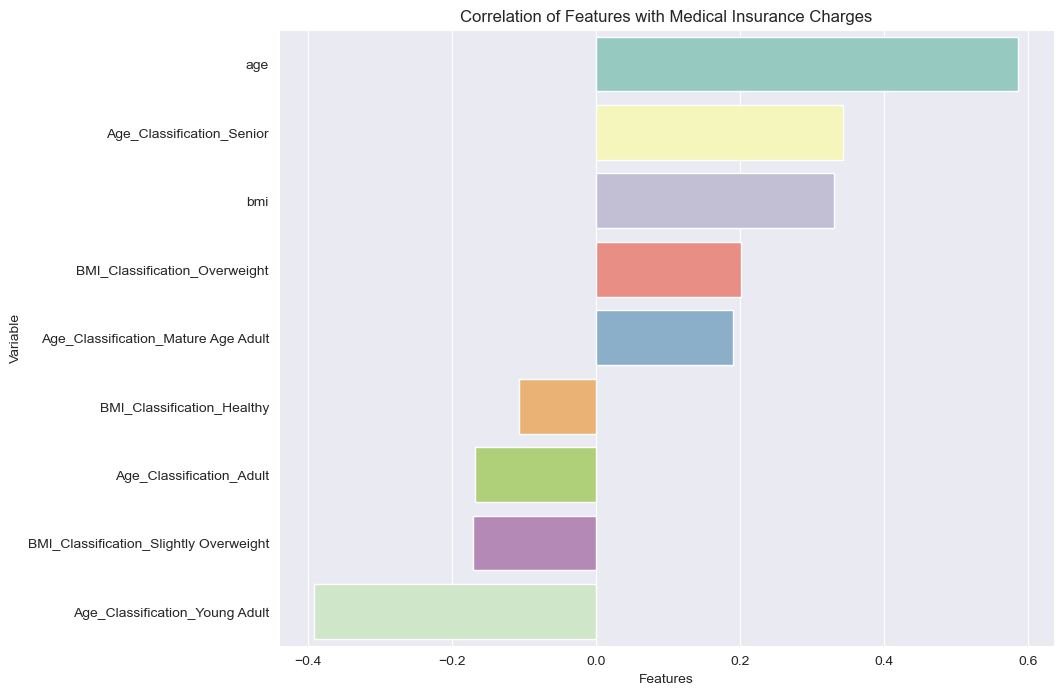

In [24]:
# Create a series of the correlation coefficients for 'medical_insurance_charges'
corrs_with_charges_ageBmi = corr_matrix_combined_ageBmi['medical_insurance_charges'].sort_values(ascending=False)

# Remove 'medical_insurance_charges' from the series to focus on other variables
corrs_with_charges_ageBmi = corrs_with_charges_ageBmi.drop('medical_insurance_charges')

# Create a barplot to visualize the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=corrs_with_charges_ageBmi.values, y=corrs_with_charges_ageBmi.index, orient='h')
plt.title("Correlation of Features with Medical Insurance Charges")
plt.xlabel("Features")
plt.ylabel("Variable")
plt.show()

<h3> <span style="color:orange"> Please note that Step 13 - Step 15 are challening questions and will intentionally be more difficult. </h3> 

### Creating a Multiple Regression Model


When you worked on this case study in Excel, you went through the tricky process of manually building out your regressive equation. It's good for you to know that this process is much simpler in Python!  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multiple regression model (which is a linear regression model with more than one independent variable).

### Step 15: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Medical Insurance Charges (Y-Variable) against all your independent variables in the `FamInsureCo_Combined` dataframe. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the dataframes you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two dataframes named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Medical Insurance Charges.
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<h2><b style="color:salmon"> Place your code here </b> </h2> 

In [25]:
# Create a datafraome with dependent variable
dependent_variable =  faminsure_combined['medical_insurance_charges']

# Create a dataframe with independent variables
independent_variables = pd.get_dummies(faminsure_combined.drop('medical_insurance_charges', axis=1), drop_first=True).astype(float)

# Add constant to the data
independent_variables = sm.add_constant(independent_variables)

# Store the independent variables and fit the model
regression_model = sm.OLS(dependent_variable, independent_variables).fit()

# Show the summary statistics of the regression model
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     medical_insurance_charges   R-squared:                       0.756
Model:                                   OLS   Adj. R-squared:                  0.753
Method:                        Least Squares   F-statistic:                     314.7
Date:                       Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                               13:36:43   Log-Likelihood:                -13535.
No. Observations:                       1338   AIC:                         2.710e+04
Df Residuals:                           1324   BIC:                         2.717e+04
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1323.5243    686.973      1.927      0.054     -24.150    2671.198
age                                      305.6633     31.367      9.745      0.000     244.128     367.198
bmi                                      126.3047     54.325      2.325      0.020      19.732     232.877
Age_Classification_Adult                 426.5043    409.905      1.040      0.298    -377.631    1230.639
Age_Classification_Mature Age Adult     -505.9502    444.162     -1.139      0.255   -1377.288     365.388
Age_Classification_Senior               -153.3948    936.630     -0.164      0.870   -1990.836    1684.047
Age_Classification_Young Adult          1556.3650    605.326      2.571      0.010     368.863    2743.867
BMI_Classification_Healthy              -466.6345    457.988     -1.019      0.308   -1365.096     431.827
BMI_Classification_Overweight           2801.3029    740.418      3.783      0.000    1348.782    4253.824
BMI_Classification_Slightly Overweight  -101.4308    468.812     -0.216      0.829   -1021.126     818.264
BMI_Classification_Underweight          -909.7133   1072.828     -0.848      0.397   -3014.341    1194.914
sex_female                               728.8693    381.135      1.912      0.056     -18.825    1476.564
sex_male                                 594.6550    381.226      1.560      0.119    -153.217    1342.527
smoker_no                              -1.128e+04    394.149    -28.616      0.000   -1.21e+04   -1.05e+04
smoker_yes                               1.26e+04    406.258     31.021      0.000    1.18e+04    1.34e+04
region_northeast                         870.1465    328.179      2.651      0.008     226.339    1513.954
region_northwest                         497.4948    324.078      1.535      0.125    -138.268    1133.258
region_southeast                          -2.7988    361.948     -0.008      0.994    -712.854     707.256
region_southwest                         -41.3182    334.399     -0.124      0.902    -697.328     614.691
==============================================================================
Omnibus:                      321.987   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.829
Skew:                           1.288   Prob(JB):                    1.39e-171
Kurtosis:                       5.735   Cond. No.                     1.20e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-30. This might indicate that there are
st

<b> What do you observe from the R Squared Value in your model? Is the model a good fit or a poor fit? </b>

The R-squared value in the model that included outliers was approximately 0.756 or 75.6%. This value represents the proportion of the variance in the dependent variable (medical_insurance_charges) that is predictable from the independent variables in the model. Generally, an R-squared value closer to 1 indicates a better model fit.

In this case, with an R-squared value of 0.756, we can say that the model explains about 75.6% of the variability in medical insurance charges. This is relatively high and suggests a good fit, especially considering that real-world data is often noisy and it's rare to get a model that explains all of the variability.

However, it's important to note that a high R-squared value alone does not guarantee that the model is appropriate for the data or that it will perform well on new, unseen data. Other factors, such as the significance of individual predictors and the validity of the underlying assumptions of the regression model, should also be considered.

### Step 16: <span style="color:purple">Use OLS Regression Again</span> 

Now we've fitted a model using the `Faminsureco_Combined` Dataframe, where we haven't removed any outliers from our data.
Now we know that Outliers are deviations in our dataset, greater than +- 3 standard deviations away from our population mean.

Would our model potentially score higher if we *remove* these outliers from our analysis? Let's take a look and try this out!

<b> i) Remove the Outliers from the `FamInsureCo_Combined` Dataframe using the Syntax we've highlighted below and store this in a new dataframe called `FamInsureCo_Combined_Dataframe_Outliers_Removed` </b>
 
    Q1 = faminsureco_combined['medical_insurance_charges'].quantile(0.25)
    Q3 = faminsureco_combined['medical_insurance_charges'].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Limit = Q3 + 1.5 * IQR
    faminsureco_combined[~(faminsureco_combined['medical_insurance_charges'] > Upper_Limit)]

ii) Upon completion of this, create a regression equation that models the Medical Insurance Charges (Y-Variable) against all your independent variables in the `FamInsureCo_Combined_Dataframe_Outliers_Removed` dataframe. </b>

<b> Hint: Watch out for the capitalisation; Python is case sensitive so be careful when looking at your variable names! </b>

In [26]:
Q1 = faminsure_combined['medical_insurance_charges'].quantile(0.25)
Q3 = faminsure_combined['medical_insurance_charges'].quantile(0.75)
IQR = Q3 - Q1
Upper_Limit = Q3 + (1.5 * IQR)
faminsure_combined_df_outliers_removed = faminsure_combined[~(faminsure_combined['medical_insurance_charges'] > Upper_Limit)]

In [27]:
# Create a datafraome with dependent variable
dependent_variable_noOutliers =  faminsure_combined_df_outliers_removed['medical_insurance_charges']

# Create a dataframe with independent variables
independent_variables_noOutliers = pd.get_dummies(faminsure_combined_df_outliers_removed.drop('medical_insurance_charges', axis=1), drop_first=True).astype(float)

# Add constant to the data
independent_variables_noOutliers = sm.add_constant(independent_variables_noOutliers)

# Store the independent variables and fit the model
regression_model_noOutliers = sm.OLS(dependent_variable_noOutliers, independent_variables_noOutliers).fit()

# Show the summary statistics of the regression model
regression_model_summary_noOutliers = regression_model_noOutliers.summary()
regression_model_summary_noOutliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     medical_insurance_charges   R-squared:                       0.609
Model:                                   OLS   Adj. R-squared:                  0.605
Method:                        Least Squares   F-statistic:                     142.2
Date:                       Tue, 26 Sep 2023   Prob (F-statistic):          6.01e-231
Time:                               13:37:04   Log-Likelihood:                -11794.
No. Observations:                       1199   AIC:                         2.362e+04
Df Residuals:                           1185   BIC:                         2.369e+04
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1592.3720    559.653      2.845      0.005     494.350    2690.394
age                                      306.7539     25.071     12.235      0.000     257.565     355.943
bmi                                      -43.3930     45.230     -0.959      0.338    -132.132      45.347
Age_Classification_Adult                 455.4833    329.885      1.381      0.168    -191.741    1102.708
Age_Classification_Mature Age Adult     -613.1093    357.837     -1.713      0.087   -1315.174      88.956
Age_Classification_Senior               -339.6281    754.986     -0.450      0.653   -1820.887    1141.631
Age_Classification_Young Adult          2089.6261    483.492      4.322      0.000    1141.031    3038.221
BMI_Classification_Healthy                56.6616    348.897      0.162      0.871    -627.862     741.185
BMI_Classification_Overweight           1826.5893    604.308      3.023      0.003     640.956    3012.222
BMI_Classification_Slightly Overweight   891.8680    365.056      2.443      0.015     175.640    1608.096
BMI_Classification_Underweight         -1182.7470    818.778     -1.445      0.149   -2789.163     423.669
sex_female                               977.6428    307.965      3.175      0.002     373.425    1581.860
sex_male                                 614.7291    310.495      1.980      0.048       5.548    1223.910
smoker_no                              -6563.6980    345.374    -19.005      0.000   -7241.311   -5886.086
smoker_yes                              8156.0700    361.037     22.591      0.000    7447.726    8864.414
region_northeast                        1047.0501    262.022      3.996      0.000     532.972    1561.128
region_northwest                         725.2464    255.724      2.836      0.005     223.524    1226.969
region_southeast                          70.4231    291.996      0.241      0.809    -502.463     643.309
region_southwest                        -250.3476    270.467     -0.926      0.355    -780.994     280.299
==============================================================================
Omnibus:                      737.197   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5017.768
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      11.104   Cond. No.                     1.03e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-30. This might indicate that there are
st

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model - which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



R-squared: 0.609, indicating that approximately 60.9% of the variability in Medical Insurance Charges is explained by the model. This is lower than the R-squared value of the model that included outliers (0.756 or 75.6%). This suggests that the model with outliers is a better fit for the data.

Adjusted R-squared: 0.605, which is also lower than the model with outliers (0.753). This is expected since the adjusted R-squared value penalizes the model for including more predictors.

F-statistic: 142.2, with a corresponding p-value close to zero, suggesting that at least some of the predictors are significant.

Coefficients: These have changed compared to the previous model, notably for bmi (0.338 vs. 0.020), slightly_overweight (0.015 vs. 0.829), region_northwest (0.005 vs. 0.125) and sex_male (0.048 vs. 0.119) and a few others.


### Step 17: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

We've now identified that *one* of our regressive models has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to `medical_insurance_charges`. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to `medical_insurance_charges`?)

<b>Please note we are not concerned about Multicolinearity and the associated impacts so we are not using standardisation here </b>

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to `medical_insurance_charges`. Which variables seem to showcase the strongest 'relationship' with respect to `medical_insurance_charges`? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



<h2><b style="color:salmon"> Place your code here </b> </h2>

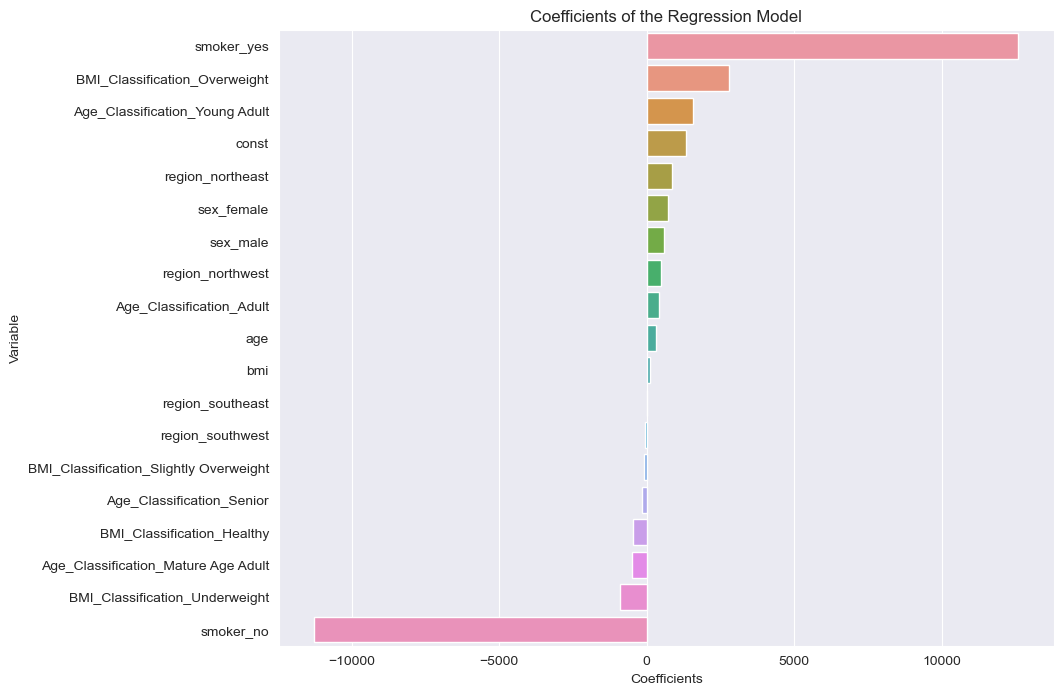

In [28]:
# Extract the p-values from the summary statistics
coefficients = regression_model.params.sort_values(ascending=False)

# Create a barplot to visualize the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients.values, y=coefficients.index, orient='h')
plt.title("Coefficients of the Regression Model")
plt.xlabel("Coefficients")
plt.ylabel("Variable")
plt.show()


The smoker_yes variable has the largest positive coefficient, indicating a strong positive relationship with medical_insurance_charges. This suggests that being a smoker significantly increases medical insurance charges.

Overweight and obese BMI classifications also have positive coefficients, indicating that higher BMI values are associated with higher medical insurance charges. However, the coefficients are much smaller compared to smoker_yes.

age also has a positive coefficient but much smaller in magnitude compared to smoker_yes.

Most of the other variables have smaller coefficients, indicating lesser impact on medical_insurance_charges.

These coefficients help in understanding how much each variable contributes to the medical_insurance_charges, which is valuable for strategic decisions in healthcare or insurance contexts.


### Step 18: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the `faminsureco_combined` dataframe, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous steps (Step 13) and apply the .predict() function to the independent variables in the `faminsureco_combined` dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Medical Insurance Charges
        Axes two would contain: Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

    primary_axes = someDataframe['A'].plot()
    second_axes = primary_axes.twinx()
    second_axes.plot(someDataframe['B'])
    plt.show()

We've included an example below of how your chart might look once you're done!

<h2><b style="color:salmon"> Place your code here </b> </h2>

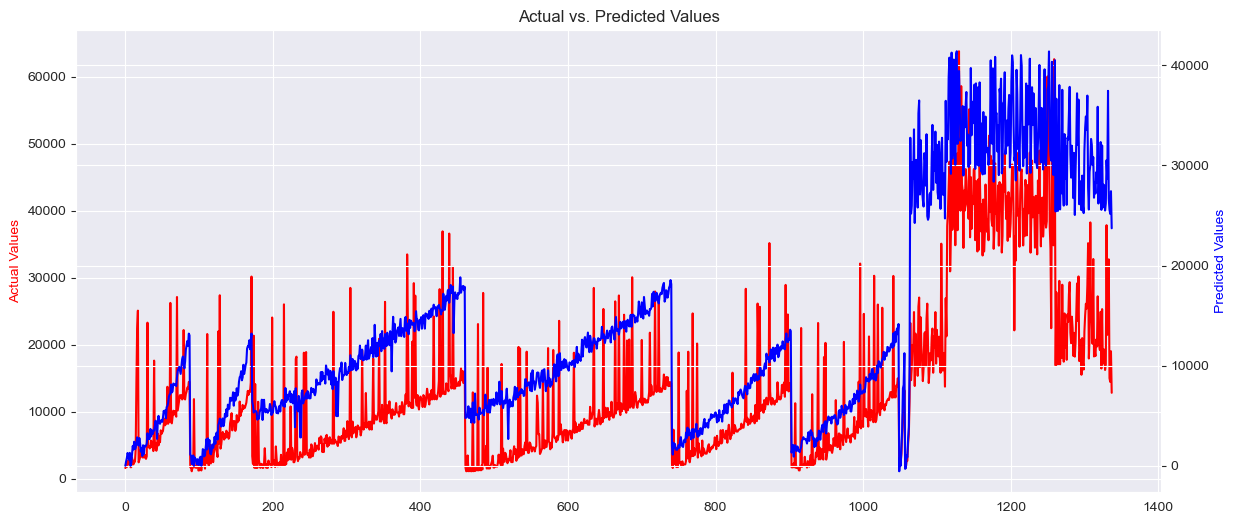

In [31]:
#Create column for predicted values
faminsure_combined['Prediction'] = regression_model.predict(independent_variables)

# Create dual axis plot to compare actual vs. predicted values
fig, ax = plt.subplots(figsize=(14, 6))
primary_axis = faminsure_combined['medical_insurance_charges'].plot(kind='line', color='red')
second_axis = primary_axis.twinx()
faminsure_combined['Prediction'].plot(ax=second_axis, color='blue')
primary_axis.set_ylabel('Actual Values', color='red')
second_axis.set_ylabel('Predicted Values', color='blue')
plt.title("Actual vs. Predicted Values")
plt.show()

The dual-axis plot visually compares the actual medical_insurance_charges (in red) with the predicted charges (in blue). This kind of validation is crucial for assessing the performance of regression models and is a key aspect in data analytics and business intelligence.

While the predicted values do not exactly match the actual charges, they generally follow the same trend. This discrepancy is expected given that the model does not perfectly explain all the variability in the charges (R-squared was around 0.756).

<h3> You've made it to the end of this challenging case study — well done! </h3>

You've learnt to perform a number of things in Python that you weren't familiar with previously.

You've been able to:

<li> Create Scatter Plots, Line Plots, Histograms, Bar Charts and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> How to Detect and Remove Outliers from your Dataset </li>
<li> How to Subset and Filter your Dataframes </li>
<li> How to use Dual Axes to Plot Multiple Variables on different axes </li>
<li> How to interpret Correlation Coefficients and Heatmaps </li>
<li> How to convert Categorical Columns into Numerical Outputs </li>
<li> How to create and assess the goodness of fit for your Linear Regression Models </li>

Well done! This is just the start of your foundation in Python as you grow more proficient in practicing against datasets both big and small.

Keep up the fantastic work and as always - if you have any questions, don't hesitate to reach out to the community, your mentor, or #slack channel for extra support! If you need, you can also reach out to the course creator, Chris Hui, via: chris.hui.sb.1990@gmail.com! 

<h3> Keep up the amazing work! </h3>
